In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from scipy.stats import pearsonr
from scipy.stats import linregress

warnings.filterwarnings('ignore')
#sns.set_theme(style="white", palette="pastel")

In [2]:
pat_68=pd.read_csv('data/Patient 68_data.csv')
pat_78=pd.read_csv('data/Patient 78_data.csv')
pat_80=pd.read_csv('data/Patient 80_data.csv')
pat_112=pd.read_csv('data/Patient 112_data.csv')
pat_129=pd.read_csv('data/Patient 129_data.csv')
pat_141=pd.read_csv('data/Patient 141_data.csv')
pat_147=pd.read_csv('data/Patient 147_data.csv')
pat_220=pd.read_csv('data/Patient 220_data.csv')
pat_240=pd.read_csv('data/Patient 240_data.csv')
pat_253=pd.read_csv('data/Patient 253_data.csv')
pat_270=pd.read_csv('data/Patient 270_data.csv')
pat_274=pd.read_csv('data/Patient 274_data.csv')
pat_278=pd.read_csv('data/Patient 278_data.csv')
pat_279=pd.read_csv('data/Patient 279_data.csv')
pat_301=pd.read_csv('data/Patient 301_data.csv')
pat_302=pd.read_csv('data/Patient 302_data.csv')
pat_316=pd.read_csv('data/Patient 316_data.csv')
pat_328=pd.read_csv('data/Patient 328_data.csv')
pat_341=pd.read_csv('data/Patient 341_data.csv')
pat_339=pd.read_csv('data/Patient 339_data.csv')
pat_356=pd.read_csv('data/Patient 356_data.csv')
pat_361=pd.read_csv('data/Patient 361_data.csv')
pat_374=pd.read_csv('data/Patient 374_data.csv')
pat_376=pd.read_csv('data/Patient 376_data.csv')
pat_379=pd.read_csv('data/Patient 379_data.csv')
pat_380=pd.read_csv('data/Patient 380_data.csv')
pat_386=pd.read_csv('data/Patient 386_data.csv')
pat_395=pd.read_csv('data/Patient 395_data.csv')
pat_458=pd.read_csv('data/Patient 458_data.csv')
pat_478=pd.read_csv('data/Patient 478_data.csv')
pat_1133=pd.read_csv('data/Patient 1133_data.csv')
pat_1685=pd.read_csv('data/Patient 1685_data.csv')
pat_3243=pd.read_csv('data/Patient 3243_data.csv')
pat_3324=pd.read_csv('data/Patient 3324_data.csv')

In [3]:
#combine the test data
df2=pd.concat([pat_141, pat_270, pat_374, pat_376],  ignore_index=True)
test_dataset=[pat_80, pat_141, pat_253, pat_270, pat_374, pat_376, pat_279,df2]

In [4]:

df1=pd.concat([ pat_68, pat_78, pat_112, pat_147, pat_220, pat_240, pat_274, pat_301,pat_316, pat_328, pat_339, pat_386, pat_380, pat_395, pat_356, pat_3243, pat_3324],  ignore_index=True)  # Separator for readability



### Data Analysis and Features selection

In [6]:
#concatenate the data

Train = df1

In [7]:
Train.describe()

hm_mode0       hm_mode1       hm_mode2       hm_mode3  \
count  130472.000000  130472.000000  130472.000000  130472.000000   
mean        0.048287       0.324109       0.776081       1.313591   
std         0.021728       0.130171       0.345575       0.302999   
min         0.002491       0.072557       0.229580       0.521649   
25%         0.032831       0.236207       0.533923       1.113539   
50%         0.042687       0.293035       0.637710       1.353115   
75%         0.057495       0.443781       0.962763       1.595867   
max         0.159646       0.655825       1.474266       1.939476   

            hm_mode4       hc_mode0       hc_mode1       hc_mode2  \
count  130472.000000  130472.000000  130472.000000  130472.000000   
mean        1.671623       5.774527       1.286570       1.056738   
std         0.202754       6.425652       0.318098       0.064615   
min         0.966602       0.940349       0.859780       0.933961   
25%         1.549937       3.417691       1.123386       1.025823   
50%         1.737733       4.614679       1.207619       1.041267   
75%         1.782235       6.939636       1.335160       1.066533   
max         1.992040     485.860891       8.014269       2.572701   

            hc_mode3       hc_mode4  ...     Disp_mode1     Disp_mode2  \
count  130472.000000  130472.000000  ...  130472.000000  130472.000000   
mean        1.027041       1.030380  ...       1.854191       1.830073   
std         0.024708       0.040750  ...       0.125871       0.166906   
min         0.870759       0.844556  ...       0.169293       0.753269   
25%         1.012825       1.005481  ...       1.836996       1.811612   
50%         1.017767       1.011812  ...       1.895730       1.855233   
75%         1.029718       1.040647  ...       1.927848       1.906201   
max         1.318617       1.240723  ...       2.044749       2.079245   

          Disp_mode3     Disp_mode4    dispm_mode0    dispm_mode1  \
count  130472.000000  130472.000000  130472.000000  130472.000000   
mean        1.949235       1.941631       0.955787       1.689459   
std         0.131576       0.120314       0.096702       0.216851   
min         0.939290       1.292709       0.045092       0.149074   
25%         1.910530       1.829464       0.900267       1.564531   
50%         1.995252       1.969520       0.944382       1.679333   
75%         2.045243       2.053437       1.008849       1.906712   
max         2.079332       2.079417       1.253316       2.053088   

         dispm_mode2    dispm_mode3    dispm_mode4            BIS  
count  130472.000000  130472.000000  130472.000000  130472.000000  
mean        1.997407       2.012760       1.974031      44.723764  
std         0.088389       0.035610       0.042413      15.670240  
min         0.942114       1.301295       1.377031       8.000000  
25%         1.977999       1.981562       1.951918      34.500000  
50%         2.006096       2.016239       1.973021      41.900000  
75%         2.059092       2.034916       1.999378      49.000000  
max         2.075506       2.071043       2.067491      97.700000  

[8 rows x 61 columns]

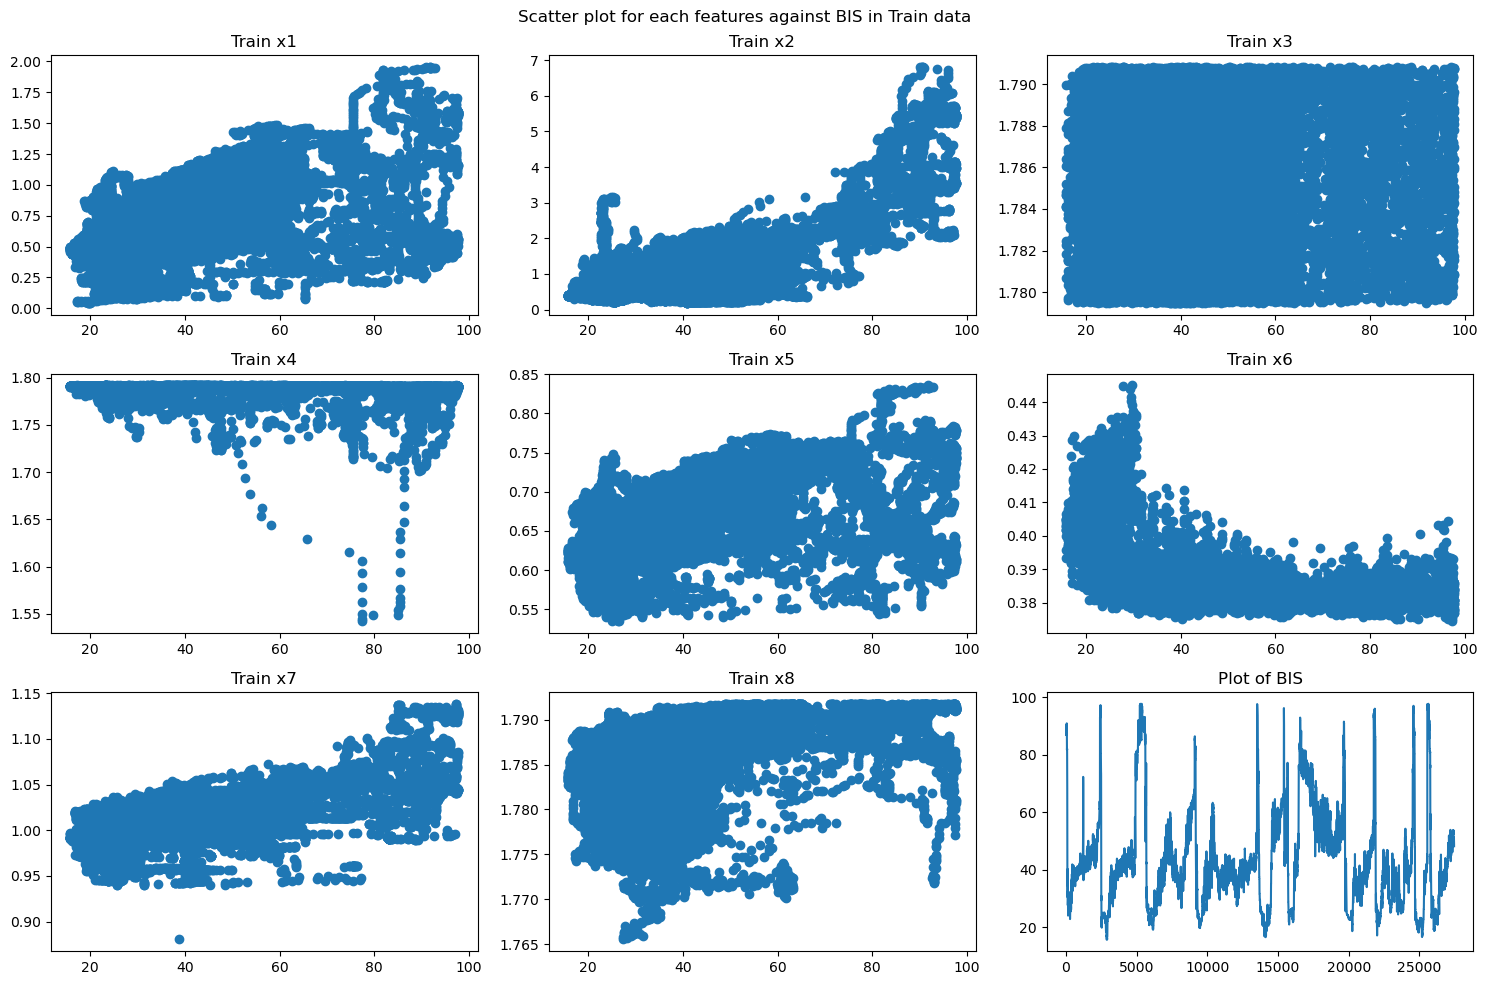

In [5]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(15, 10))

plt.suptitle('Scatter plot for each features against BIS in Train data')

# Plot on the first subplot
axes[0, 0].scatter(Train['BIS'],Train['x1'])
axes[0, 0].set_title('Train x1')

# Plot on the second subplot
axes[0, 1].scatter(Train['BIS'],Train['x2'])
axes[0, 1].set_title('Train x2')

# Plot on the third subplot
axes[0, 2].scatter(Train['BIS'], Train['x3'])
axes[0, 2].set_title('Train x3')

axes[1, 0].scatter(Train['BIS'],Train['x4'])
axes[1, 0].set_title('Train x4')

axes[1, 1].scatter(Train['BIS'], Train['x5'])
axes[1, 1].set_title('Train x5')

axes[1, 2].scatter(Train['BIS'],Train['x6'])
axes[1, 2].set_title('Train x6')

axes[2, 0].scatter(Train['BIS'], Train['x7'])
axes[2, 0].set_title('Train x7')

axes[2, 1].scatter(Train['BIS'], Train['x8'])
axes[2, 1].set_title('Train x8')

axes[2, 2].plot(Train['BIS'])
axes[2, 2].set_title('Plot of BIS')


# Adjust spacing between subplots
fig.tight_layout()



# Display the figure
plt.show()

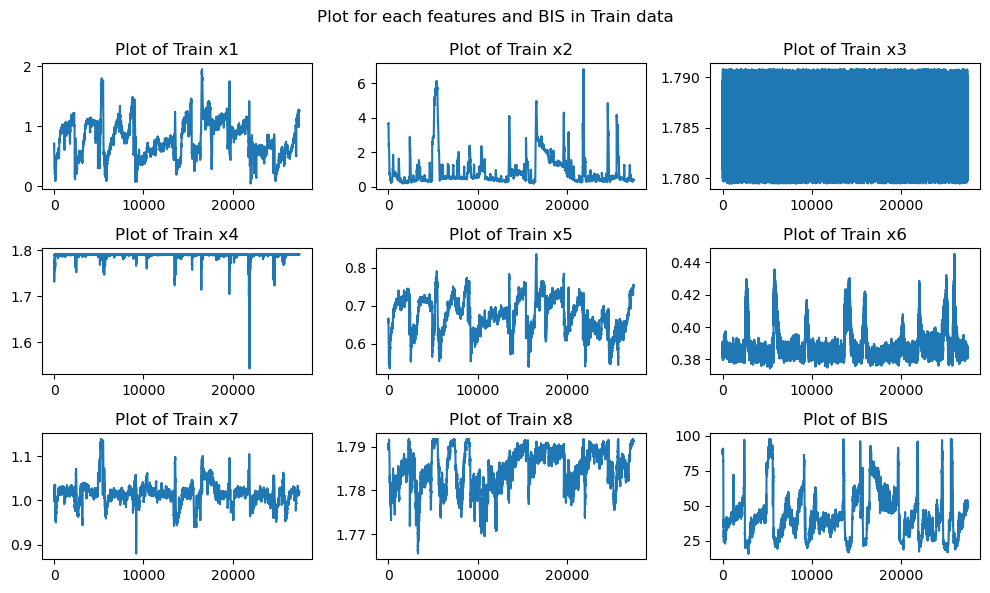

In [6]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(10, 6))

plt.suptitle('Plot for each features and BIS in Train data')


# Plot on the first subplot
axes[0, 0].plot(Train['x1'])
axes[0, 0].set_title('Plot of Train x1')

# Plot on the second subplot
axes[0, 1].plot(Train['x2'])
axes[0, 1].set_title('Plot of Train x2')

# Plot on the third subplot
axes[0, 2].plot(Train['x3'])
axes[0, 2].set_title('Plot of Train x3')

axes[1, 0].plot(Train['x4'])
axes[1, 0].set_title('Plot of Train x4')

axes[1, 1].plot(Train['x5'])
axes[1, 1].set_title('Plot of Train x5')

axes[1, 2].plot(Train['x6'])
axes[1, 2].set_title('Plot of Train x6')

axes[2, 0].plot(Train['x7'])
axes[2, 0].set_title('Plot of Train x7')

axes[2, 1].plot(Train['x8'])
axes[2, 1].set_title('Plot of Train x8')

axes[2, 2].plot(Train['BIS'])
axes[2, 2].set_title('Plot of BIS')


# Adjust spacing between subplots
fig.tight_layout()



# Display the figure
plt.show()

From the correlation, x2, x7, x6, x1, x5 and x8 seems to be the better features and are listed based on the importance from highest.

In [9]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

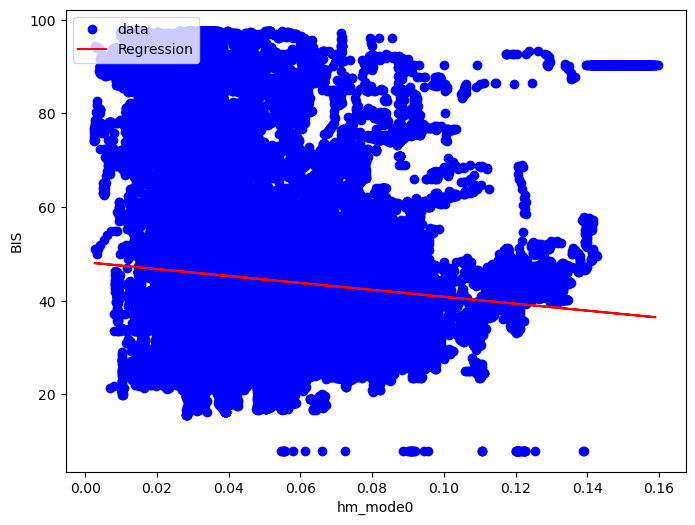

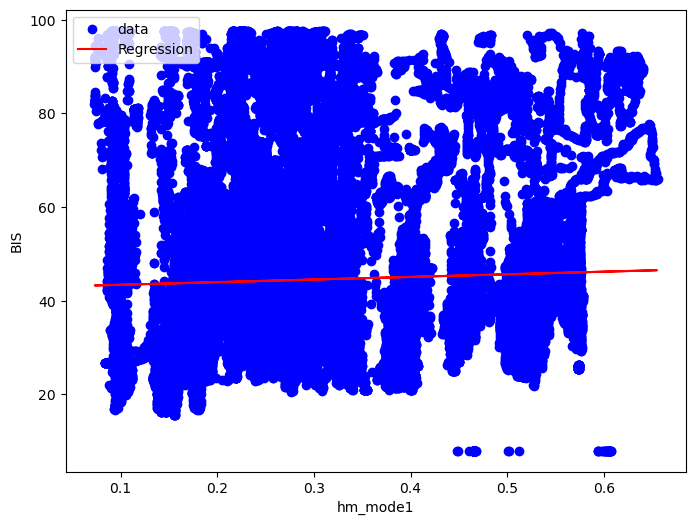

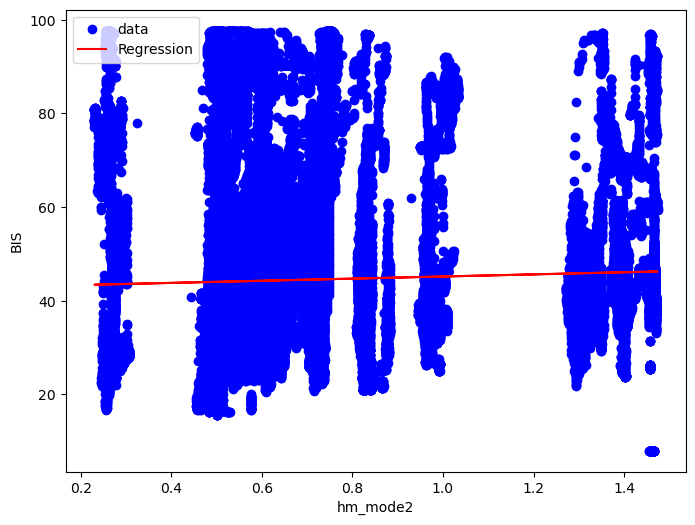

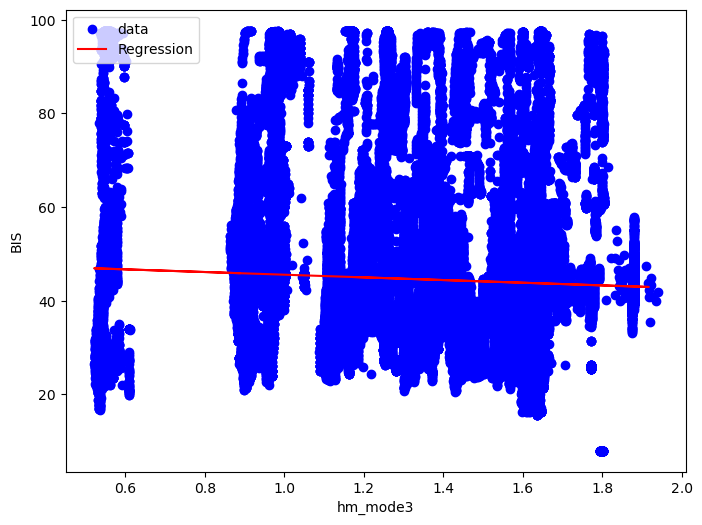

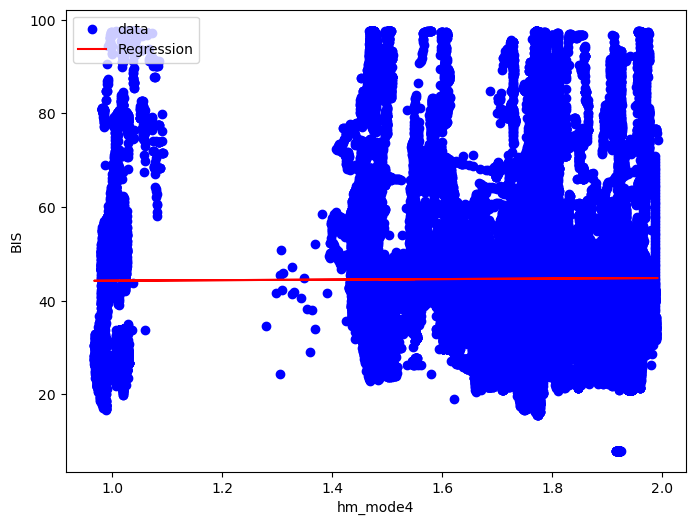

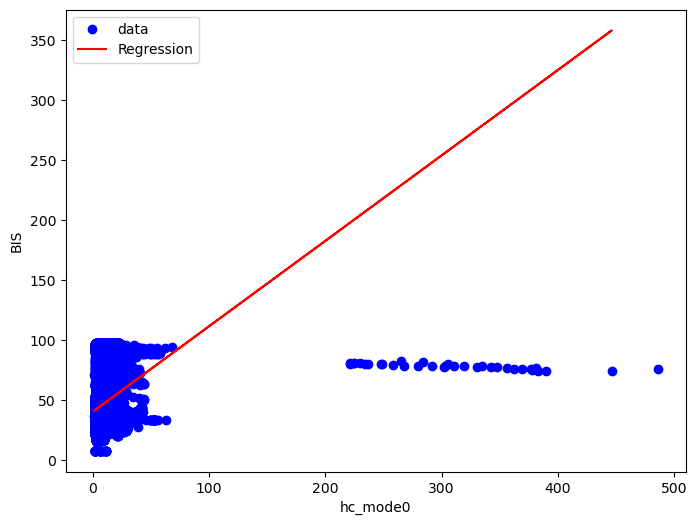

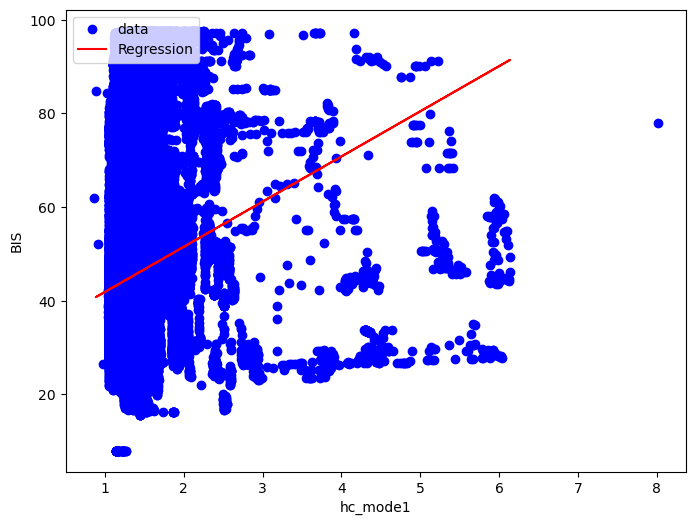

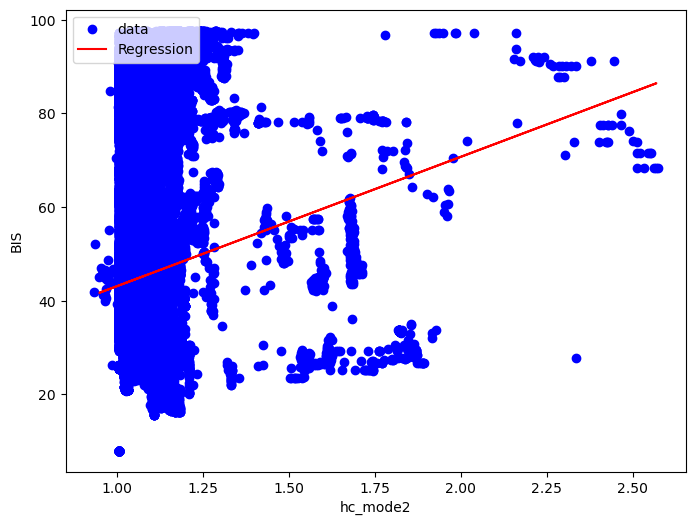

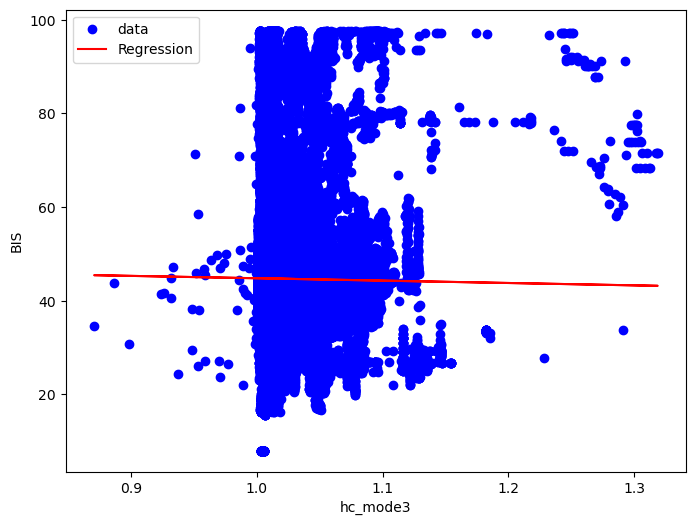

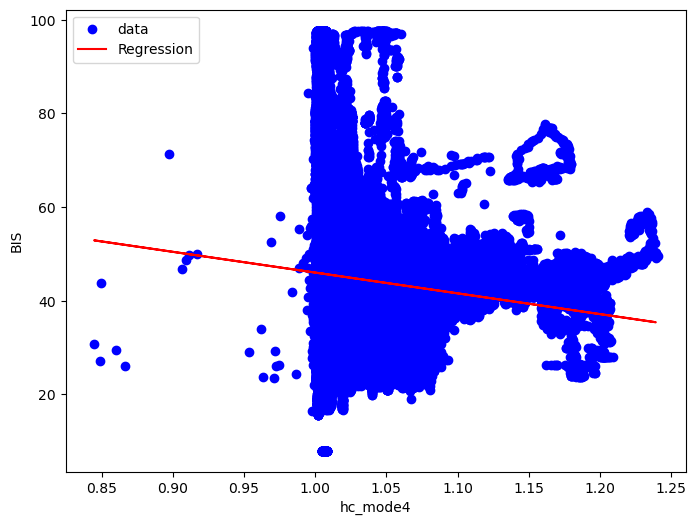

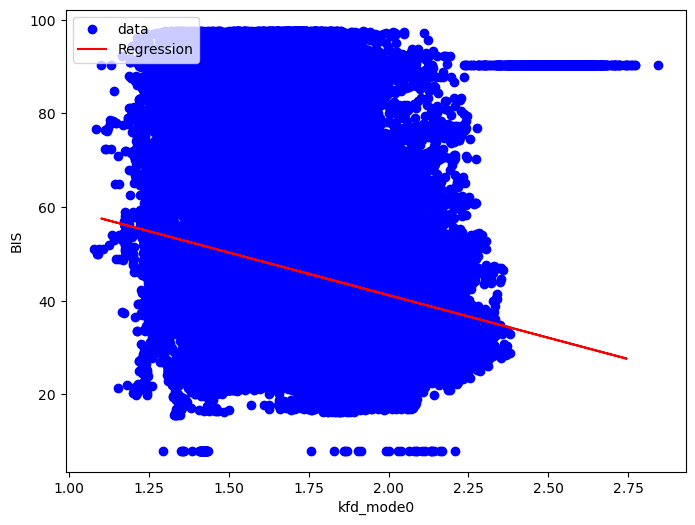

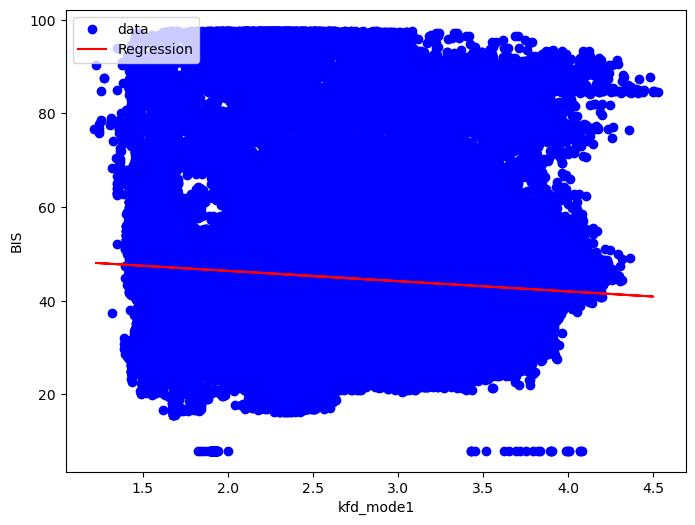

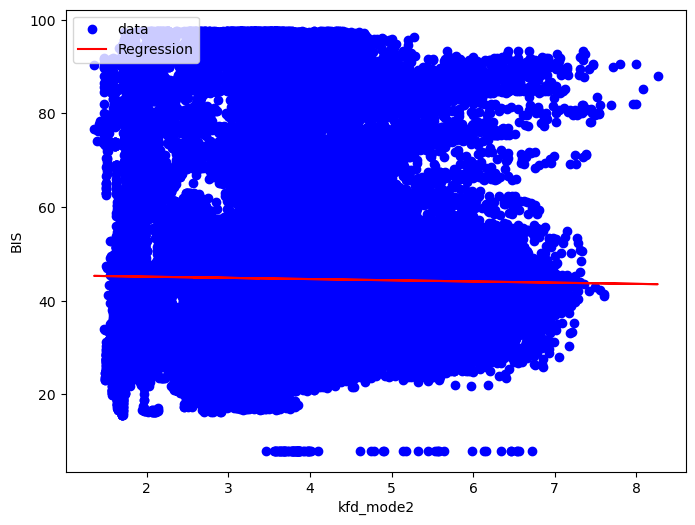

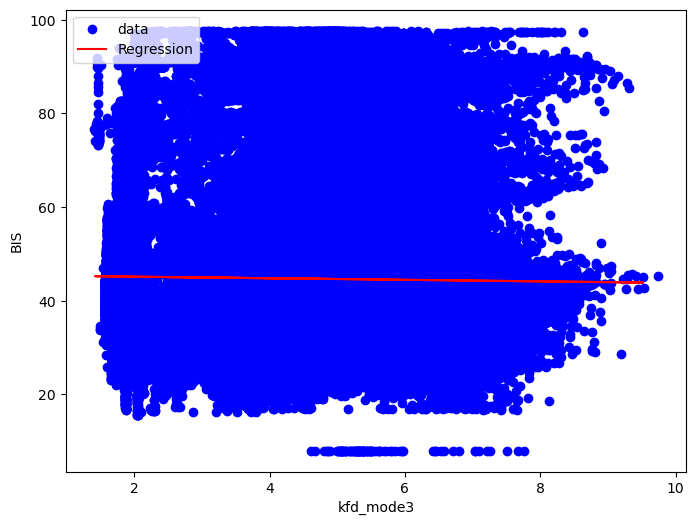

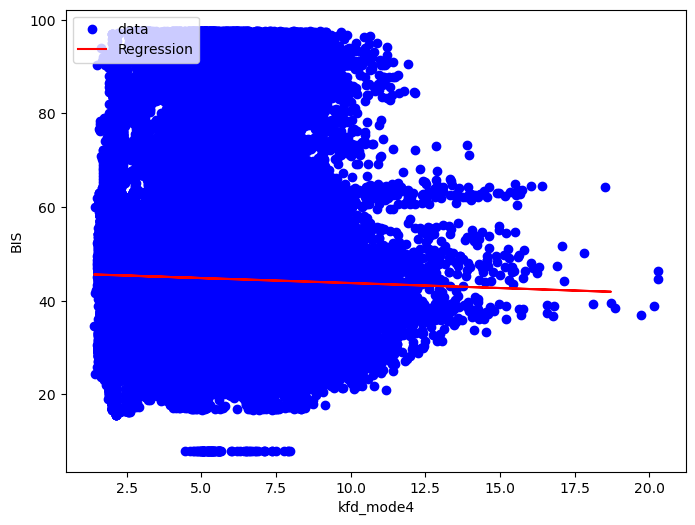

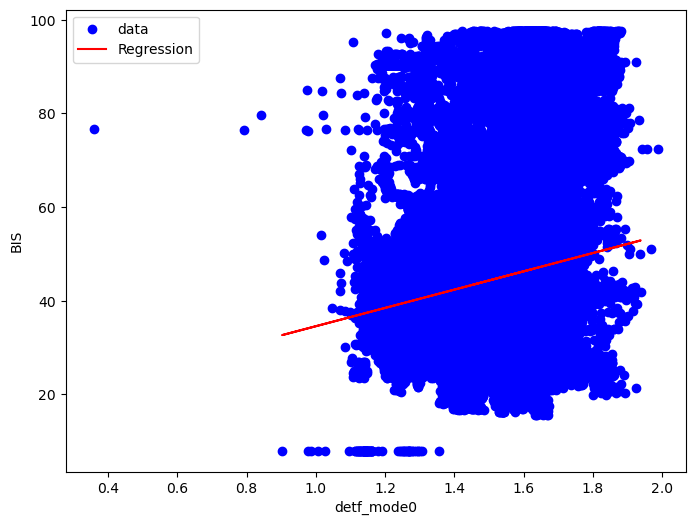

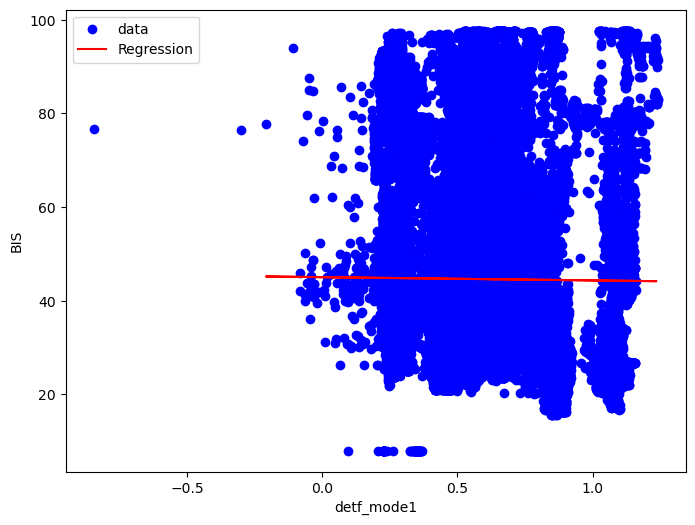

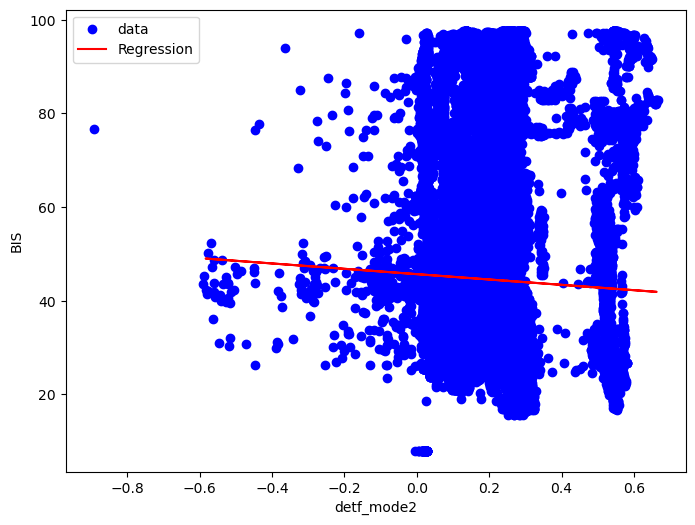

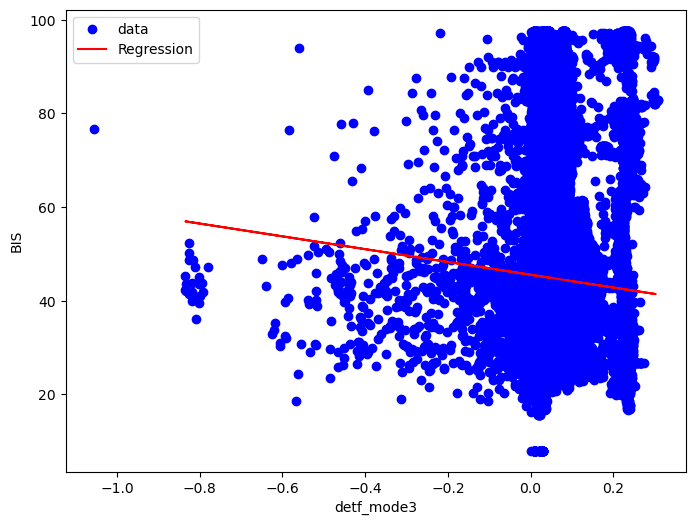

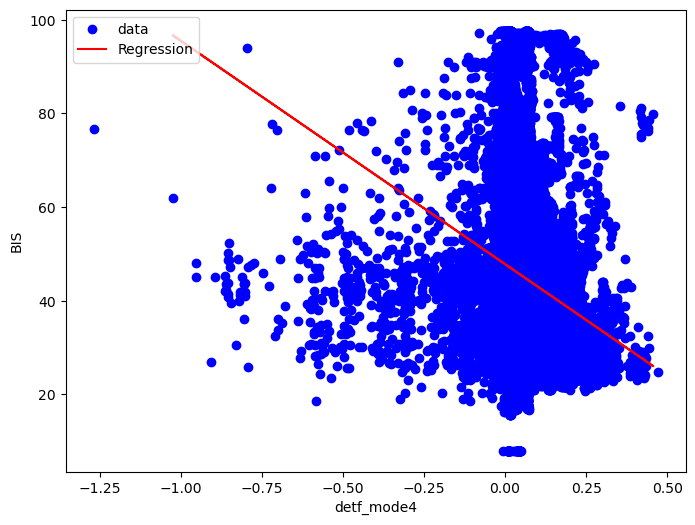

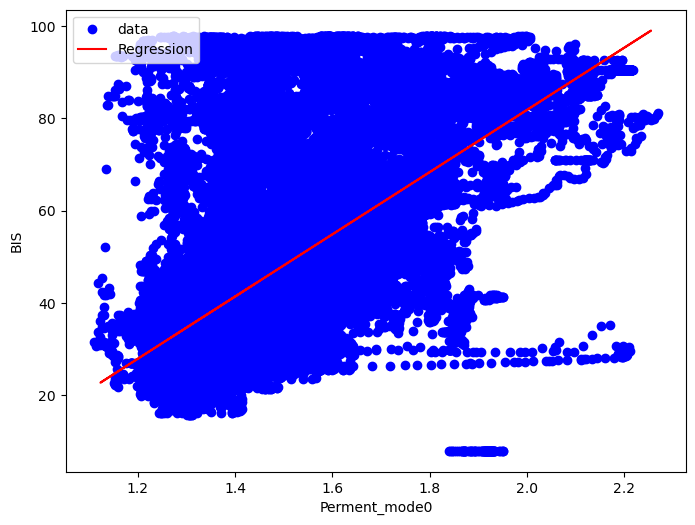

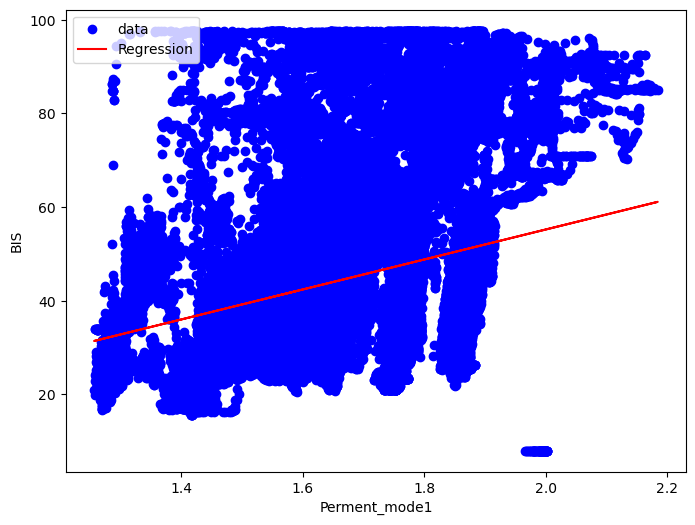

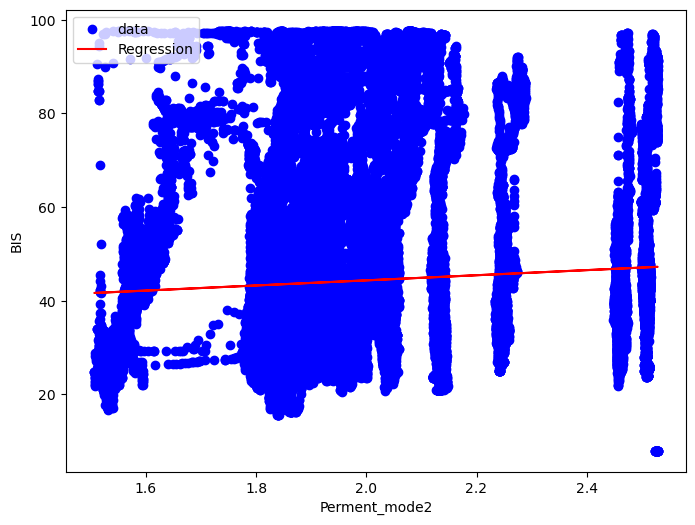

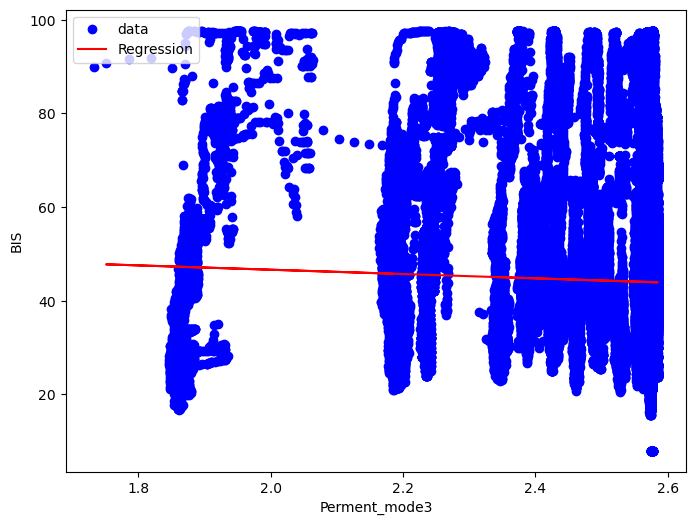

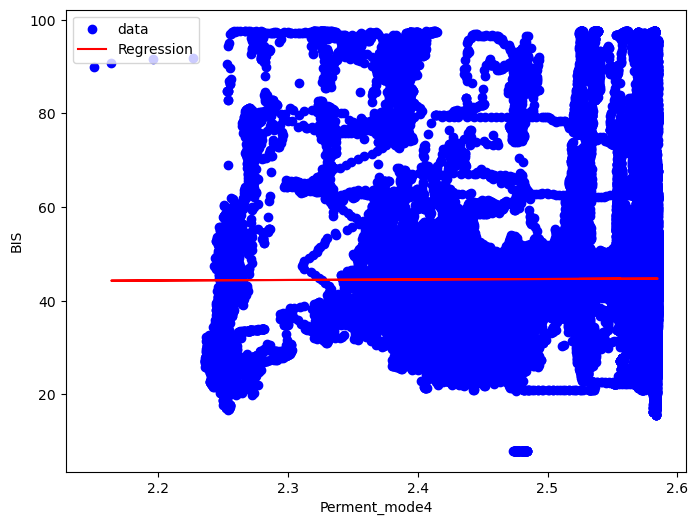

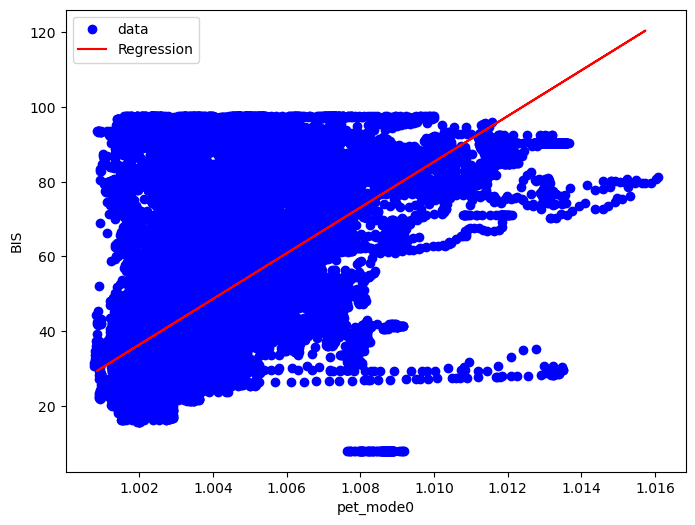

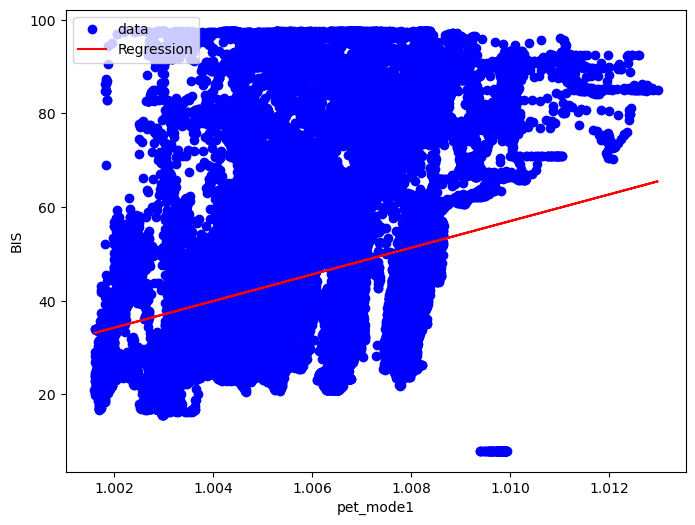

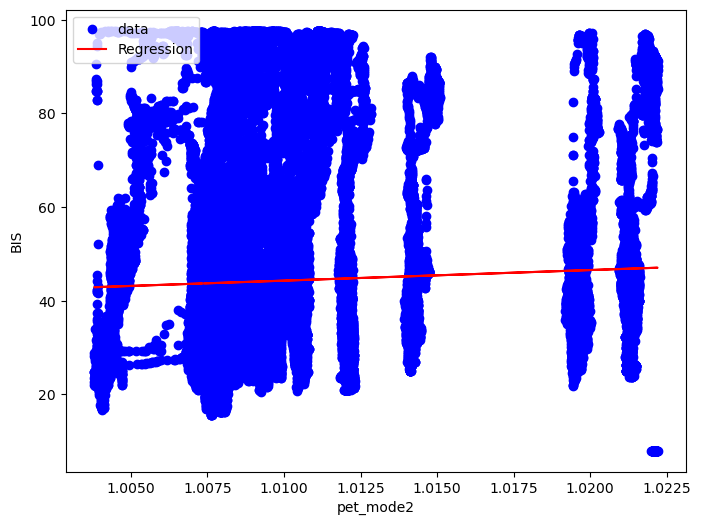

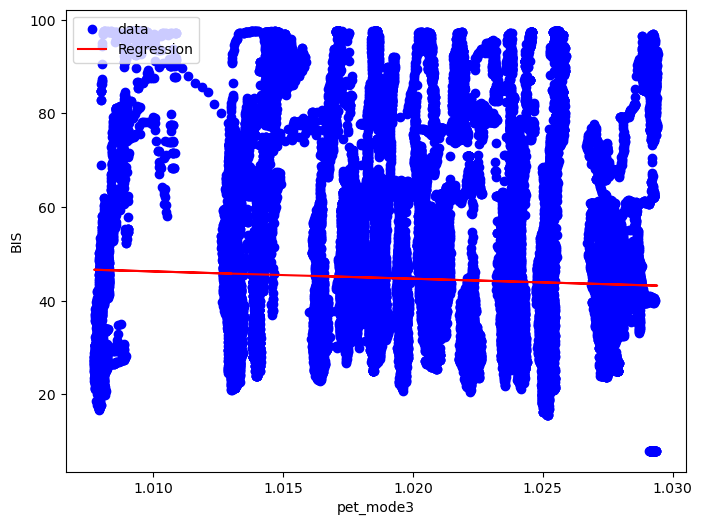

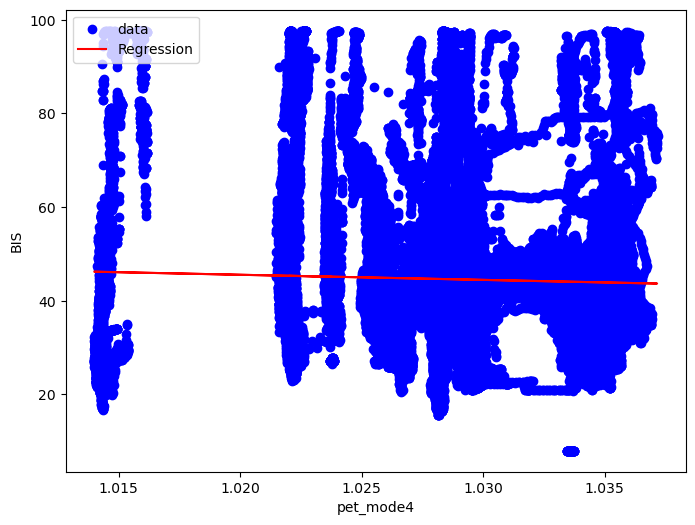

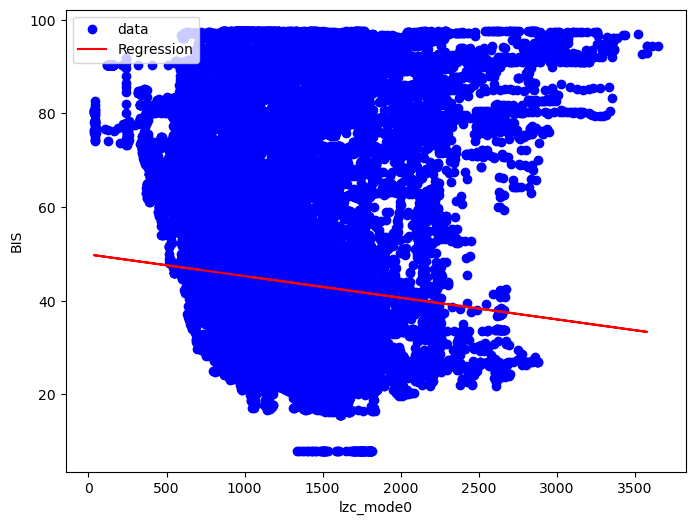

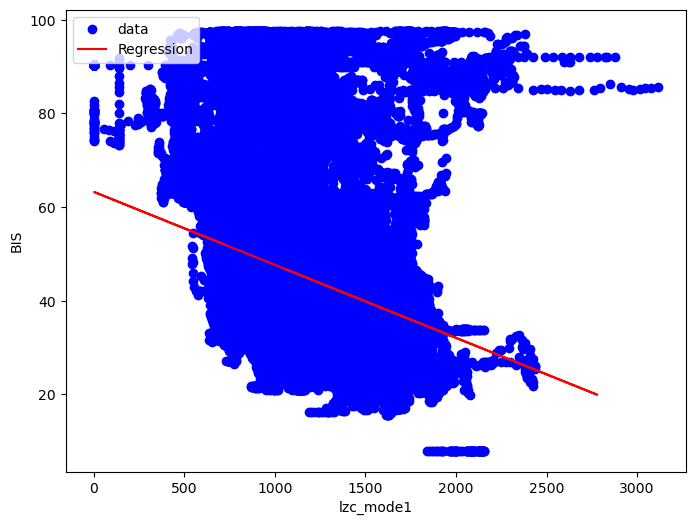

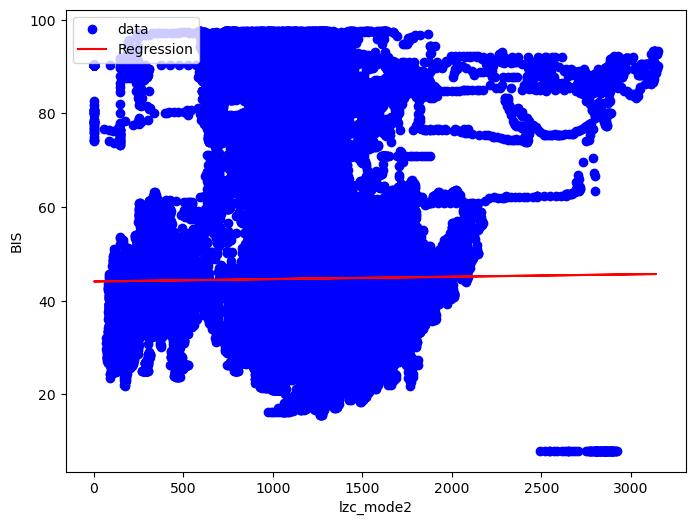

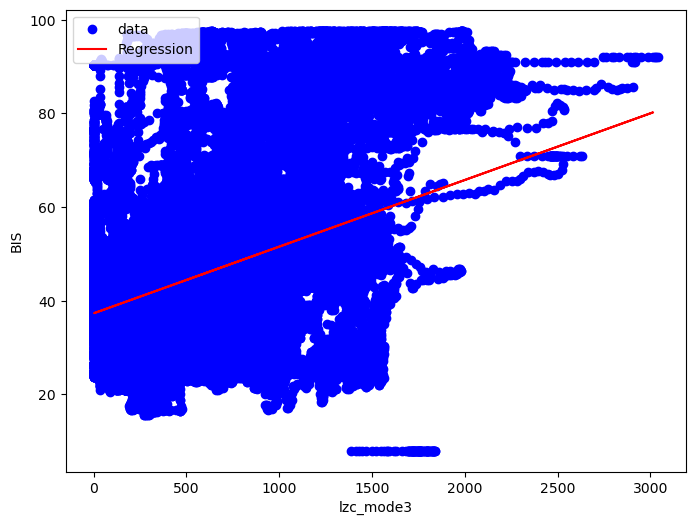

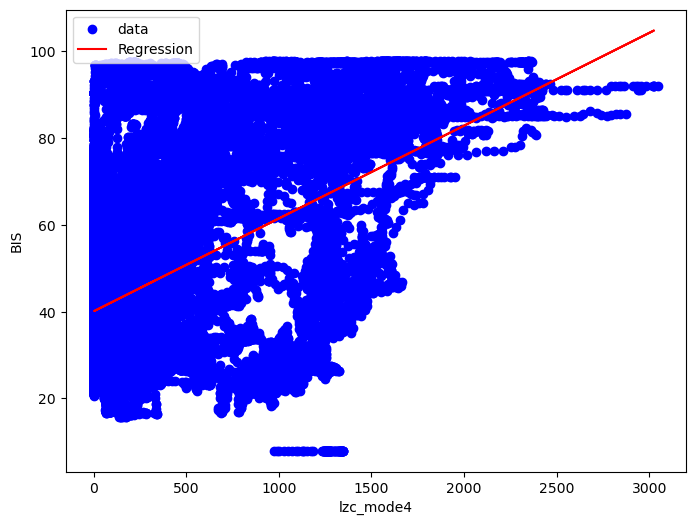

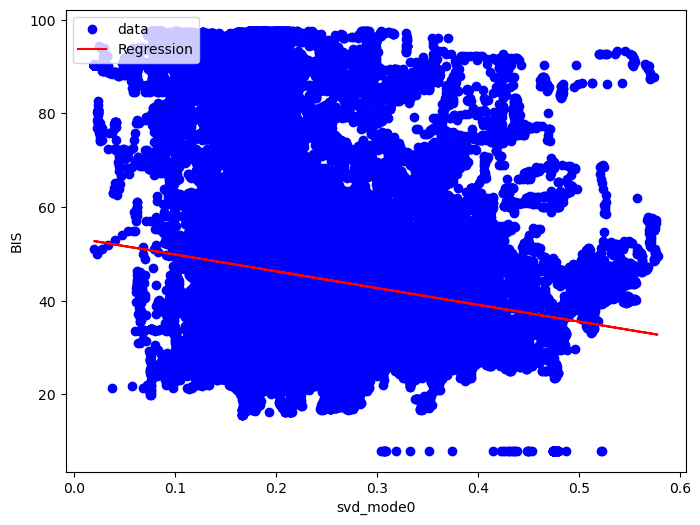

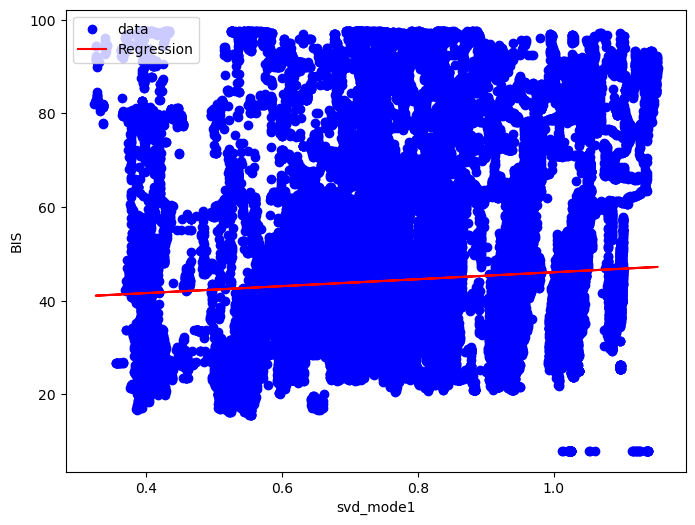

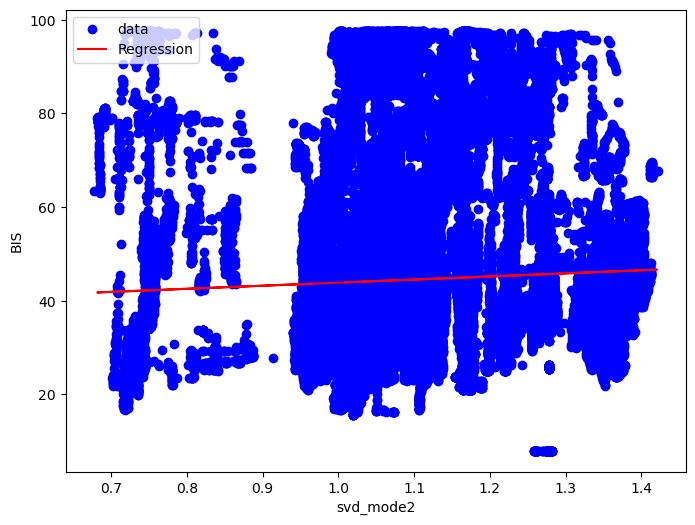

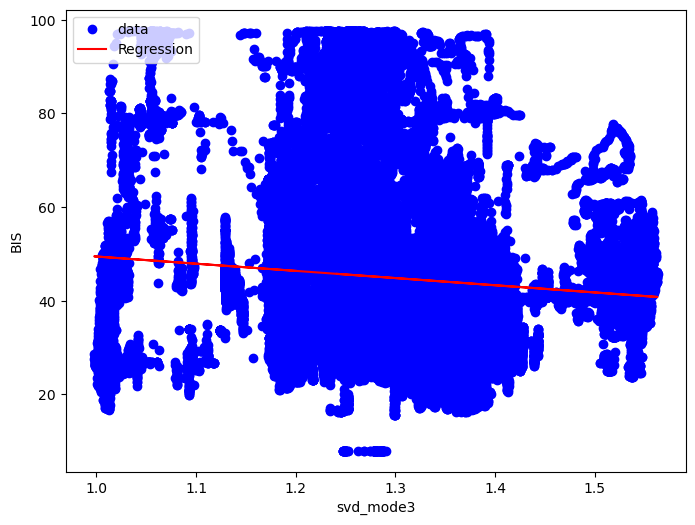

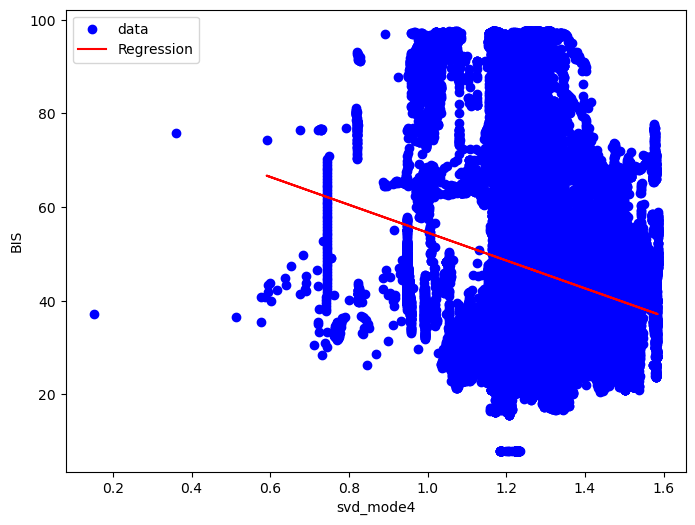

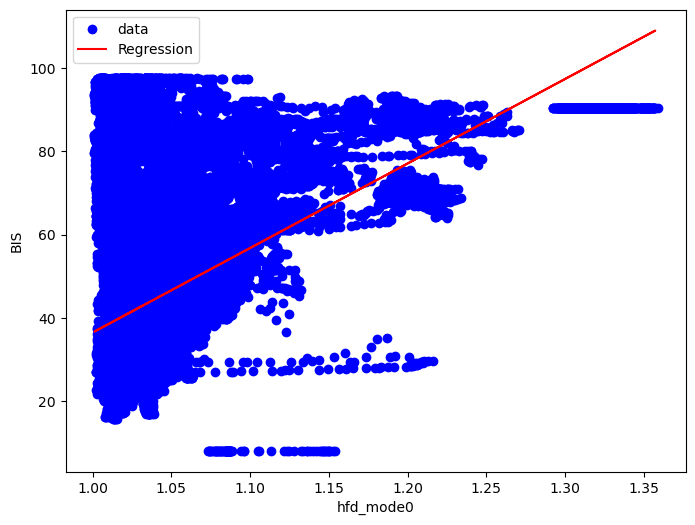

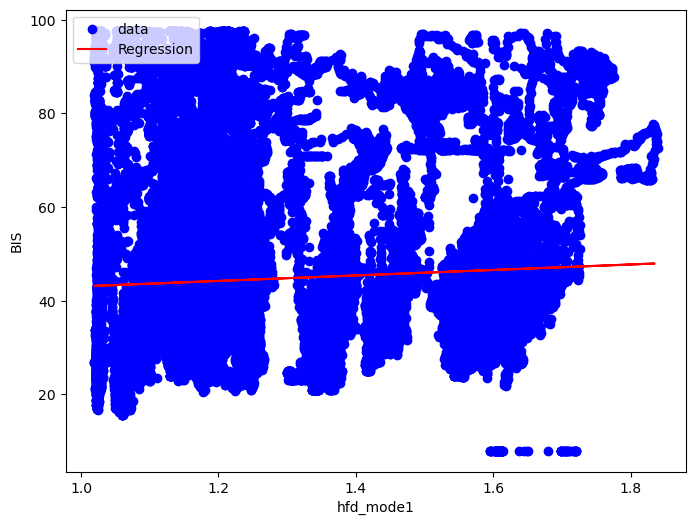

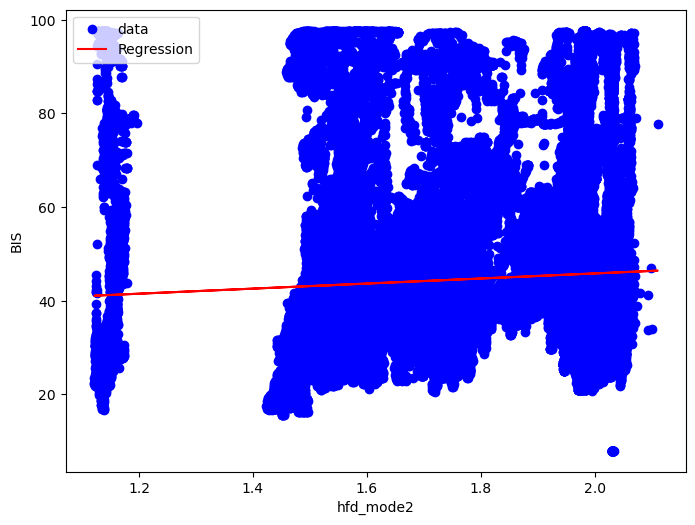

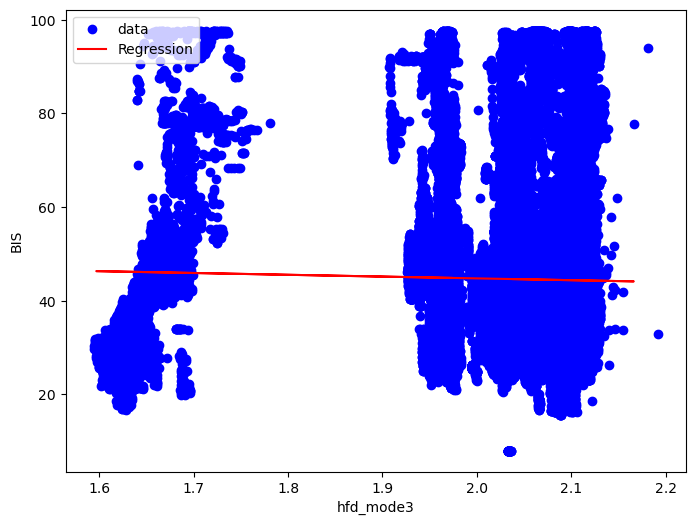

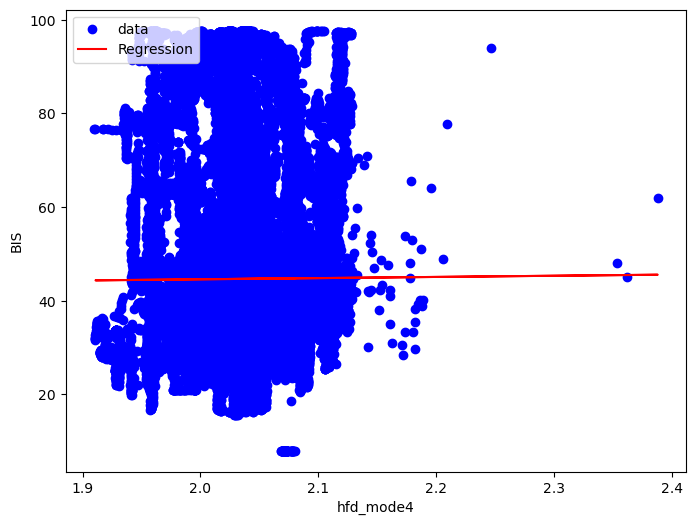

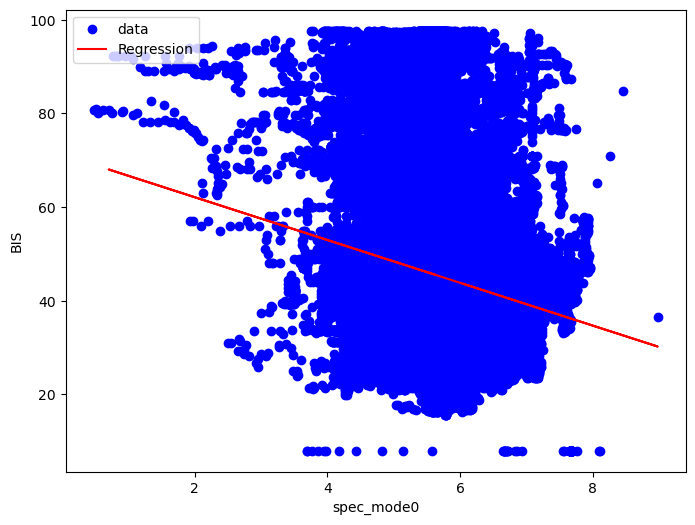

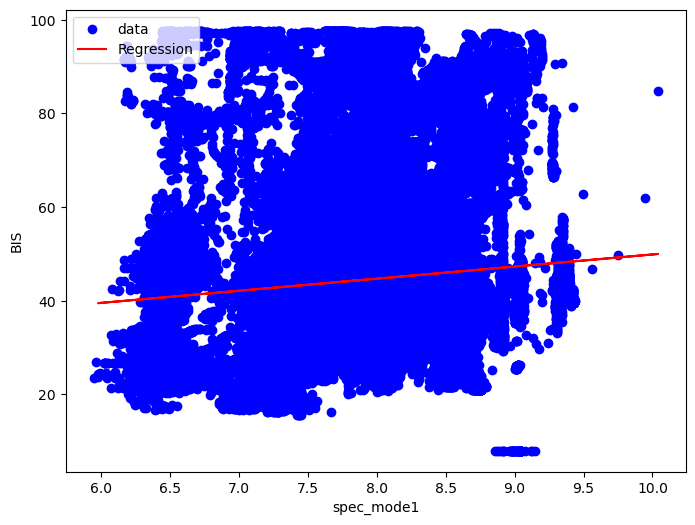

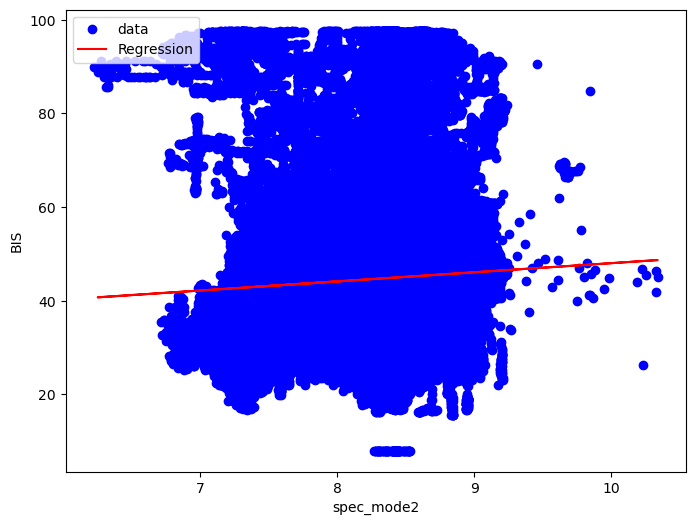

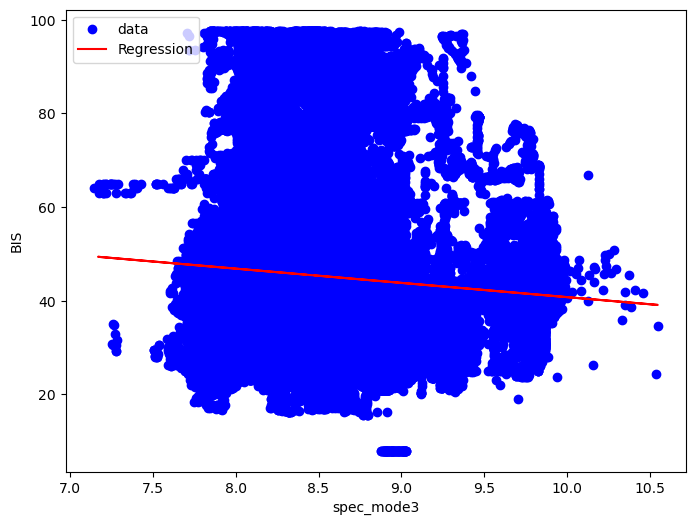

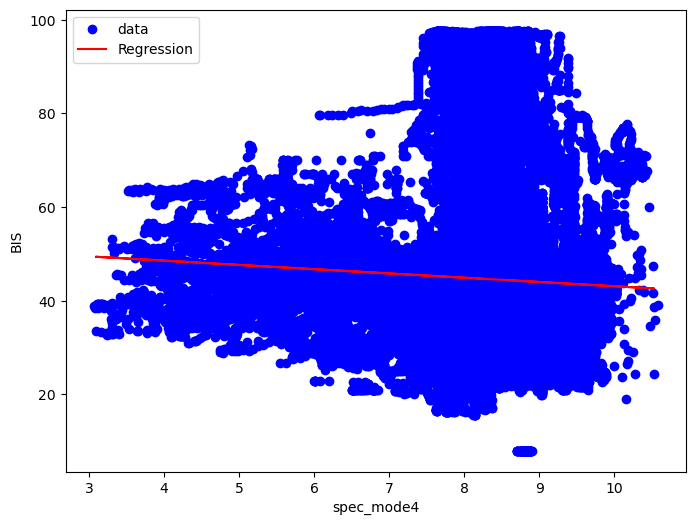

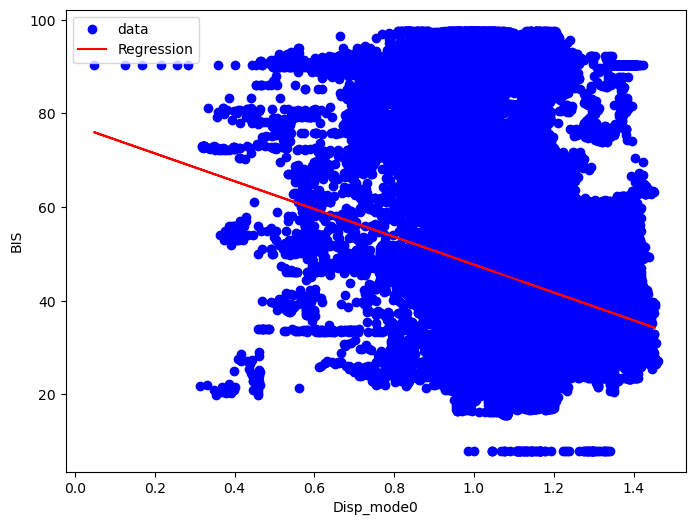

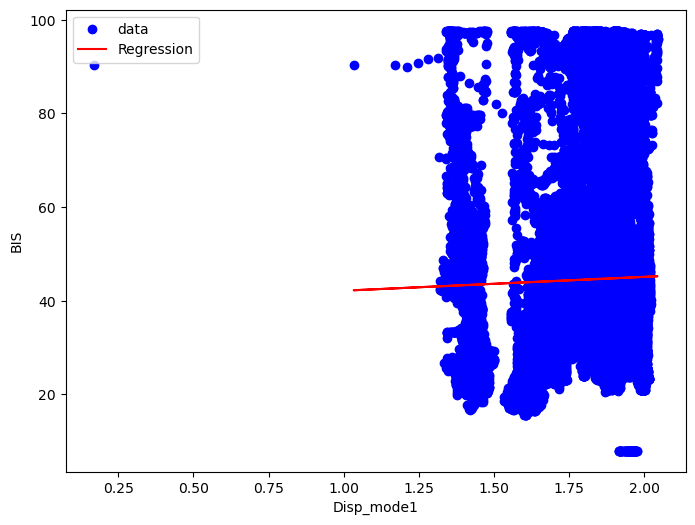

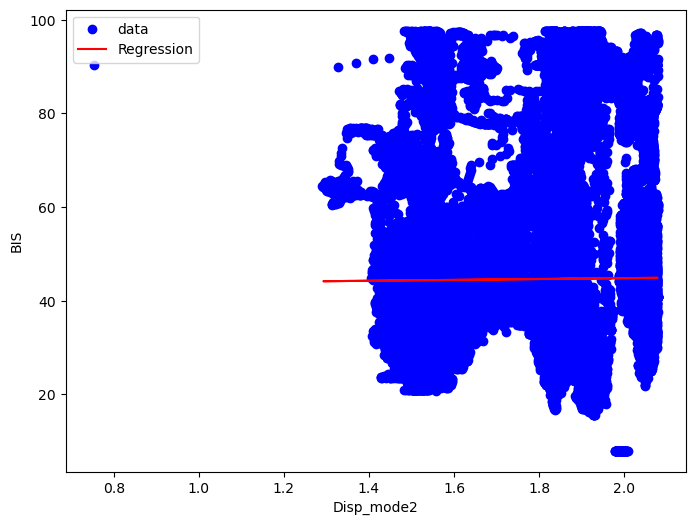

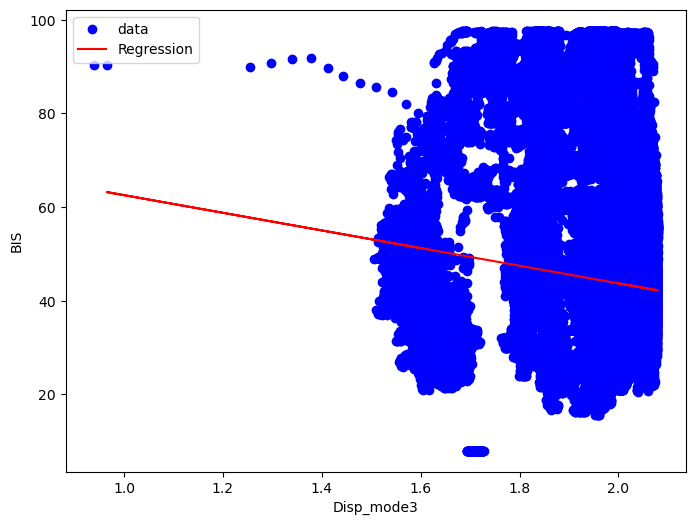

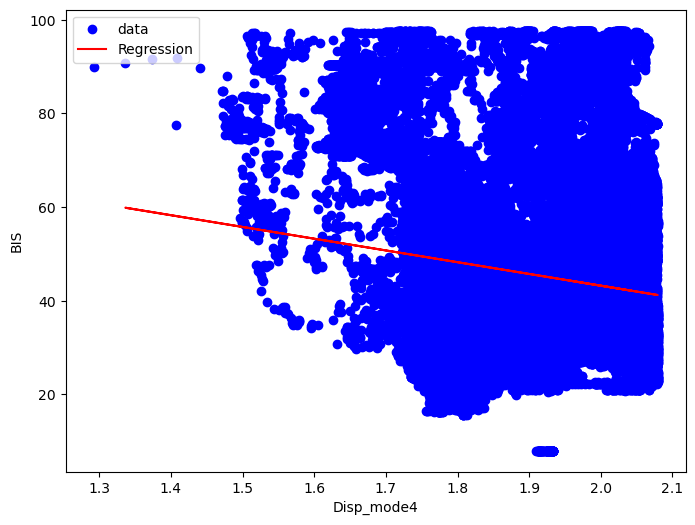

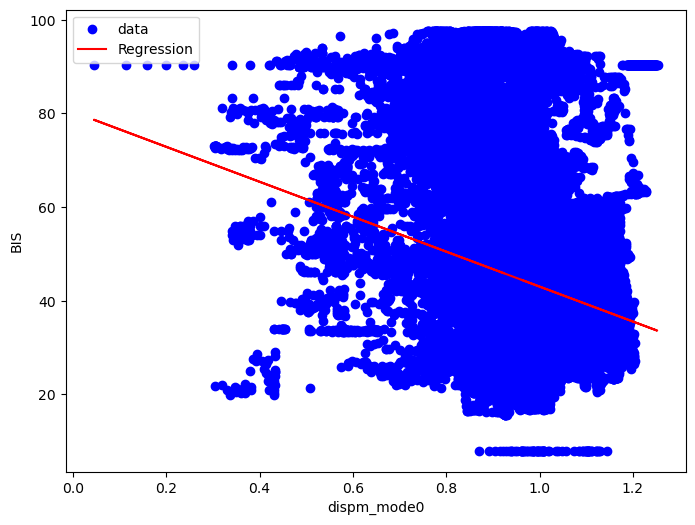

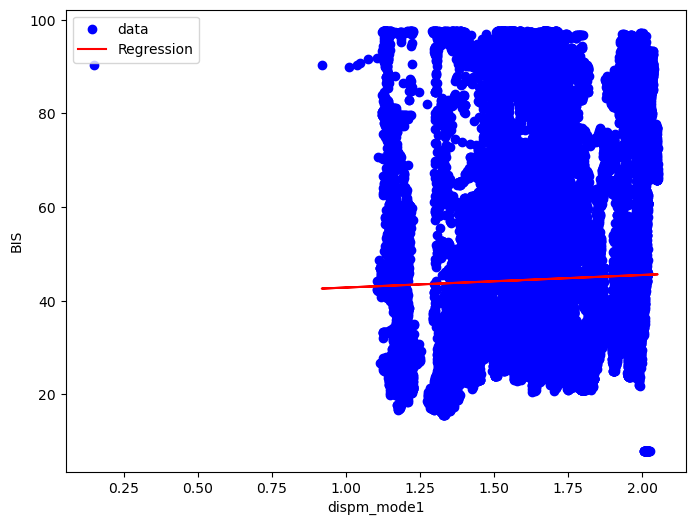

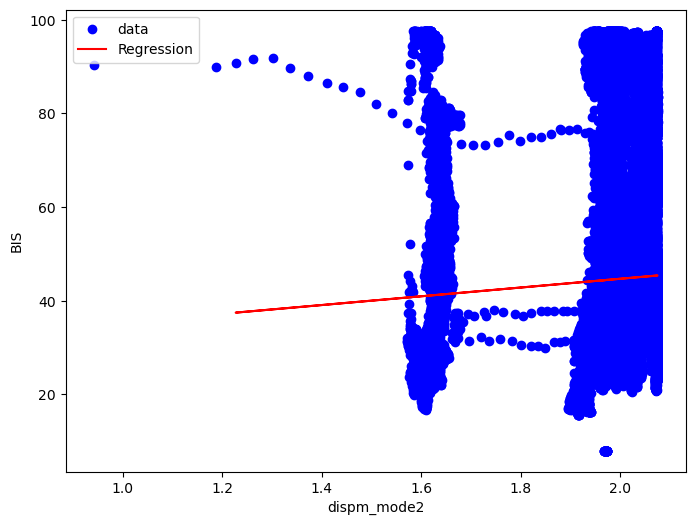

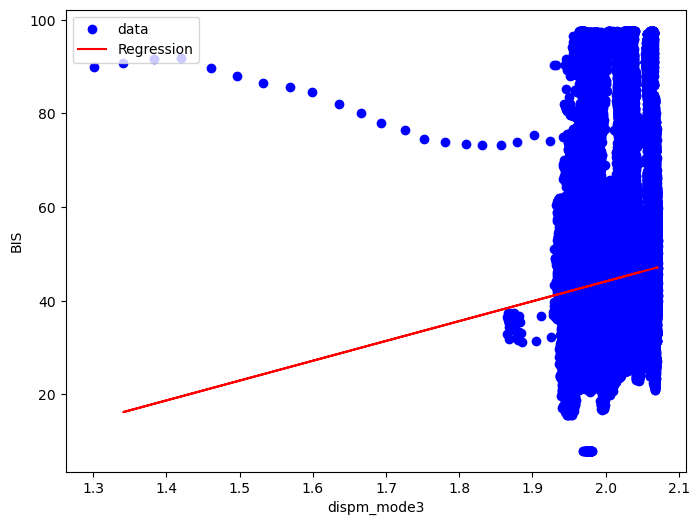

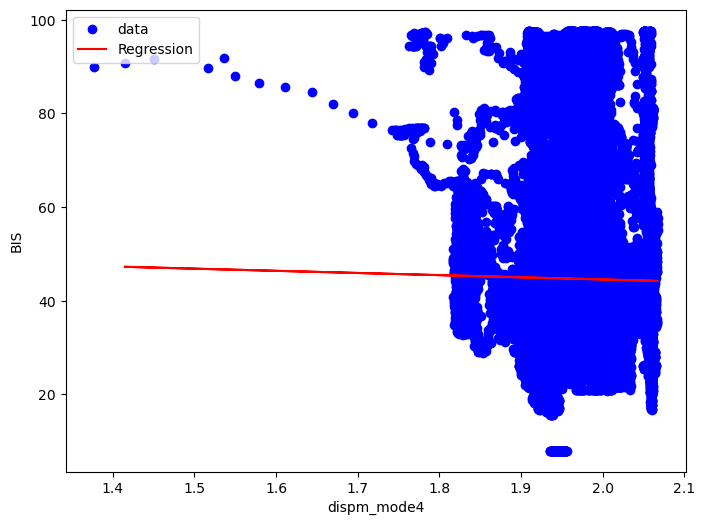

In [10]:

for column in Train.columns:
    if column == "BIS":
        continue
        
    plot_regression(Train, column)
    


In [13]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})
sort_total=total.sort_values('Values', ascending=False)
sort_total[:20]

Metrics     Values
20  Perment_mode0_r2  41.410257
25      pet_mode0_r2  40.135509
34      lzc_mode4_r2  25.032789
33      lzc_mode3_r2  16.645613
40      hfd_mode0_r2  16.401818
31      lzc_mode1_r2   9.825220
26      pet_mode1_r2   9.778540
21  Perment_mode1_r2   9.375143
5        hc_mode0_r2   9.237958
50     Disp_mode0_r2   7.167807
39      svd_mode4_r2   6.313219
10      kfd_mode0_r2   6.181575
55    dispm_mode0_r2   5.861226
19     detf_mode4_r2   5.304779
45     spec_mode0_r2   4.064020
54     Disp_mode4_r2   3.731059
35      svd_mode0_r2   3.689459
6        hc_mode1_r2   3.687978
15     detf_mode0_r2   3.066860
53     Disp_mode3_r2   2.448689

The Rsquared value showed that x2, x7, x6, x1, x5 and x8 seem to be the better features and are listed in their order of importance from the highest.

Feature 1: 938.293559
Feature 2: 186.740232
Feature 3: 219.017853
Feature 4: 264.331386
Feature 5: 3.742091
Feature 6: 8270.721631
Feature 7: 3501.262767
Feature 8: 1177.974856
Feature 9: 5.342345
Feature 10: 1166.217925
Feature 11: 5274.889485
Feature 12: 625.080575
Feature 13: 29.595830
Feature 14: 21.982472
Feature 15: 77.521470
Feature 16: 2702.863774
Feature 17: 6.589382
Feature 18: 141.256155
Feature 19: 213.331237
Feature 20: 4925.575723
Feature 21: 63419.500762
Feature 22: 9097.112497
Feature 23: 748.896761
Feature 24: 228.039641
Feature 25: 2.463805
Feature 26: 60176.858030
Feature 27: 9521.722352
Feature 28: 500.757628
Feature 29: 254.006727
Feature 30: 116.190675
Feature 31: 727.881952
Feature 32: 9184.483845
Feature 33: 20.679964
Feature 34: 17859.627189
Feature 35: 29770.628547
Feature 36: 3245.301945
Feature 37: 554.233774
Feature 38: 368.798034
Feature 39: 1282.735965
Feature 40: 5598.369109
Feature 41: 17957.796923
Feature 42: 429.074715
Feature 43: 574.012142
Feature 4

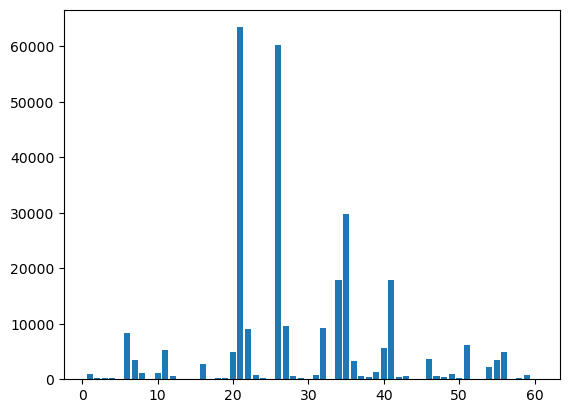

In [29]:
# f-regression feature selection meton
def select_features(X_train, y_train, X_test):
    """
    Function to to train features using f-regression
    
    returned trained input and output data and the features
    """
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X = Train.drop('BIS', axis=1)
y = Train['BIS']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)


for i in range(len(fs.scores_)):
    sort_v=pd.Series(fs.scores_[i])
    sort_vv=sort_v.sort_values(ascending=False)
    print('Feature %d: %f' % (i+1, sort_vv))

# plot the scores
plt.bar([i+1 for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [30]:
total

Metrics     Values
0        hm_mode0_r2   1.123871
1        hm_mode1_r2   0.191376
2        hm_mode2_r2   0.236876
3        hm_mode3_r2   0.277285
4        hm_mode4_r2   0.004868
5        hc_mode0_r2   9.237958
6        hc_mode1_r2   3.687978
7        hc_mode2_r2   1.167067
8        hc_mode3_r2   0.000511
9        hc_mode4_r2   1.374380
10      kfd_mode0_r2   6.181575
11      kfd_mode1_r2   0.849613
12      kfd_mode2_r2   0.033887
13      kfd_mode3_r2   0.022335
14      kfd_mode4_r2   0.090552
15     detf_mode0_r2   3.066860
16     detf_mode1_r2  -0.001791
17     detf_mode2_r2   0.172529
18     detf_mode3_r2   0.229995
19     detf_mode4_r2   5.304779
20  Perment_mode0_r2  41.410257
21  Perment_mode1_r2   9.375143
22  Perment_mode2_r2   0.841272
23  Perment_mode3_r2   0.225293
24  Perment_mode4_r2  -0.011094
25      pet_mode0_r2  40.135509
26      pet_mode1_r2   9.778540
27      pet_mode2_r2   0.549639
28      pet_mode3_r2   0.272746
29      pet_mode4_r2   0.068152
30      lzc_mode0_r2   0.783958
31      lzc_mode1_r2   9.825220
32      lzc_mode2_r2  -0.003799
33      lzc_mode3_r2  16.645613
34      lzc_mode4_r2  25.032789
35      svd_mode0_r2   3.689459
36      svd_mode1_r2   0.642890
37      svd_mode2_r2   0.426020
38      svd_mode3_r2   1.406550
39      svd_mode4_r2   6.313219
40      hfd_mode0_r2  16.401818
41      hfd_mode1_r2   0.451927
42      hfd_mode2_r2   0.703498
43      hfd_mode3_r2   0.019398
44      hfd_mode4_r2  -0.017469
45     spec_mode0_r2   4.064020
46     spec_mode1_r2   0.768170
47     spec_mode2_r2   0.379038
48     spec_mode3_r2   1.146920
49     spec_mode4_r2   0.255591
50     Disp_mode0_r2   7.167807
51     Disp_mode1_r2   0.073874
52     Disp_mode2_r2  -0.008038
53     Disp_mode3_r2   2.448689
54     Disp_mode4_r2   3.731059
55    dispm_mode0_r2   5.861226
56    dispm_mode1_r2   0.133386
57    dispm_mode2_r2   0.328192
58    dispm_mode3_r2   0.869127
59    dispm_mode4_r2   0.012483

In [27]:
sort_v

0    12.120267
dtype: float64

The f-regression showed that x2, x7, x6, x1, x5 and x8 are the better features.

In [32]:

# select top 8 features using mRMR
from mrmr import mrmr_regression
selected_features = mrmr_regression(X=X, y=y, K=20)

print(selected_features)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.73it/s]

['Perment_mode0', 'svd_mode0', 'pet_mode0', 'lzc_mode4', 'lzc_mode3', 'hfd_mode0', 'lzc_mode1', 'pet_mode1', 'hc_mode0', 'Perment_mode1', 'kfd_mode0', 'svd_mode4', 'Disp_mode4', 'Disp_mode0', 'detf_mode4', 'Disp_mode3', 'dispm_mode0', 'hc_mode1', 'spec_mode0', 'detf_mode0']


The mRMR above showed x8, x2, x7, x6, x4 and x5 as the better features.

The first three methods, show the same importance features of x2, x7, x6, x1, x5 and x8.

### Test data

In [13]:
#Import data

Test_1 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-1')
Test_2 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-2')
Test_3 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-3')
Test_4 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-4')
Test_5 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-5')

Test = pd.concat([Test_1, Test_2, Test_3, Test_4, Test_5], ignore_index=True)

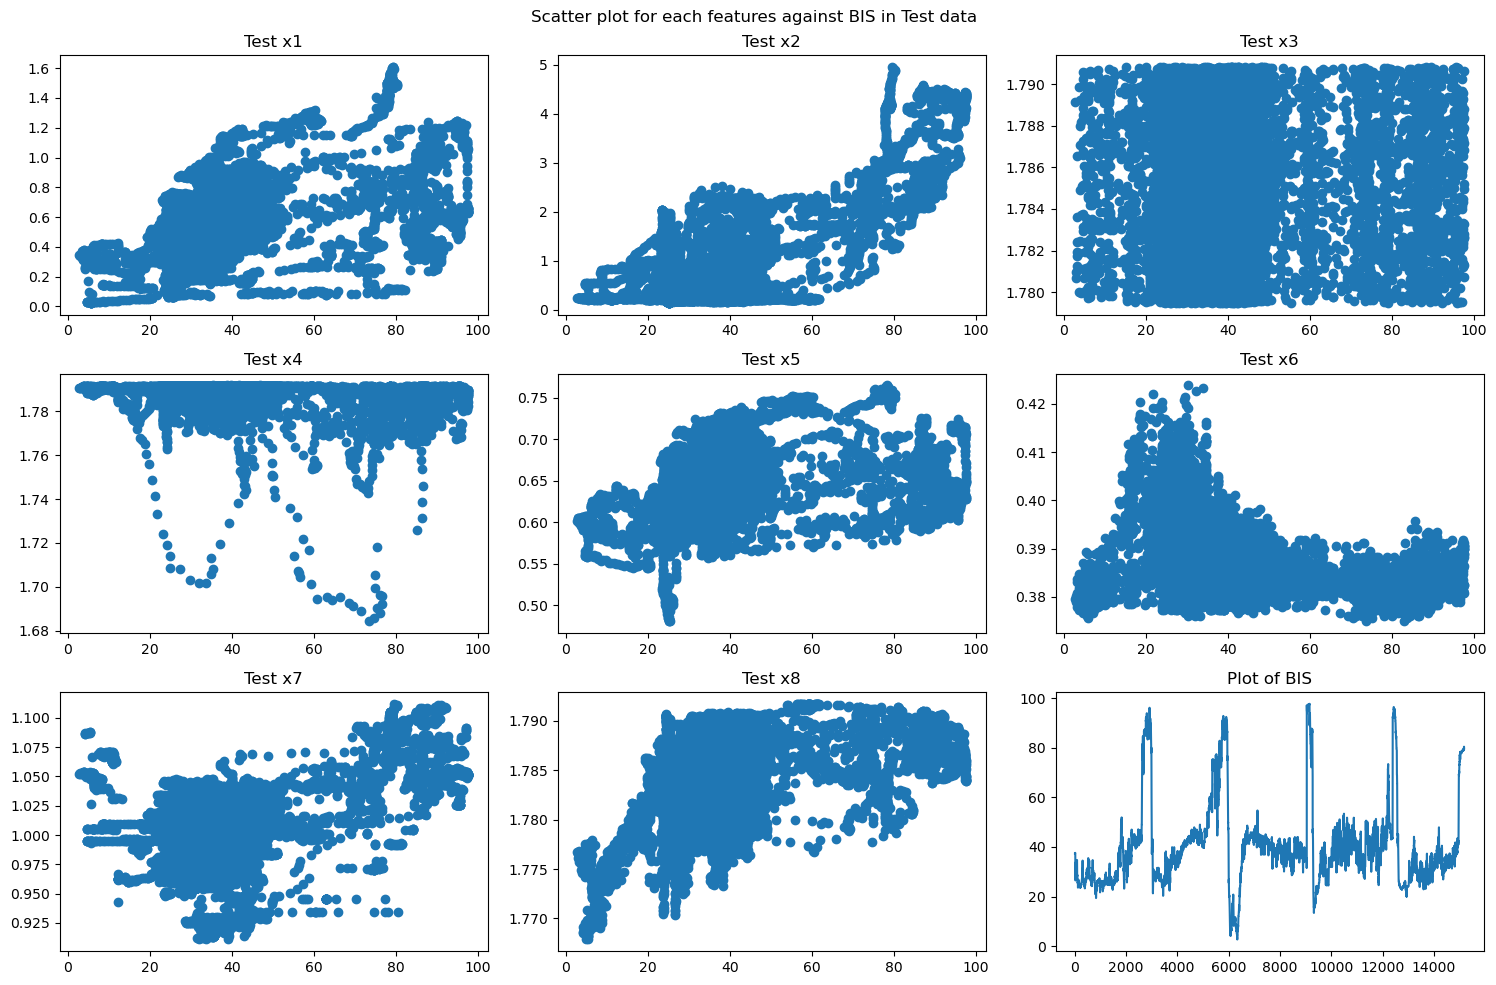

In [14]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(15, 10))

plt.suptitle('Scatter plot for each features against BIS in Test data')

# Plot on the first subplot
axes[0, 0].scatter(Test['BIS'],Test['x1'])
axes[0, 0].set_title('Test x1')

# Plot on the second subplot
axes[0, 1].scatter(Test['BIS'],Test['x2'])
axes[0, 1].set_title('Test x2')

# Plot on the third subplot
axes[0, 2].scatter(Test['BIS'], Test['x3'])
axes[0, 2].set_title('Test x3')

axes[1, 0].scatter(Test['BIS'],Test['x4'])
axes[1, 0].set_title('Test x4')

axes[1, 1].scatter(Test['BIS'], Test['x5'])
axes[1, 1].set_title('Test x5')

axes[1, 2].scatter(Test['BIS'],Test['x6'])
axes[1, 2].set_title('Test x6')

axes[2, 0].scatter(Test['BIS'], Test['x7'])
axes[2, 0].set_title('Test x7')

axes[2, 1].scatter(Test['BIS'], Test['x8'])
axes[2, 1].set_title('Test x8')

axes[2, 2].plot(Test['BIS'])
axes[2, 2].set_title('Plot of BIS')


# Adjust spacing between subplots
fig.tight_layout()



# Display the figure
plt.show()

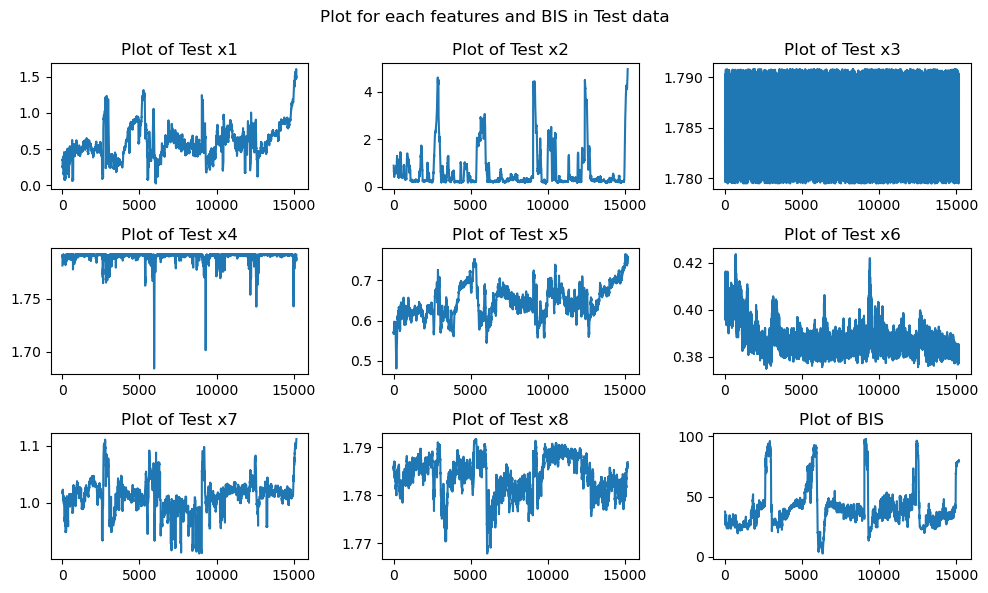

In [15]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=3,ncols=3, figsize=(10, 6))

plt.suptitle('Plot for each features and BIS in Test data')

# Plot on the first subplot
axes[0, 0].plot(Test['x1'])
axes[0, 0].set_title('Plot of Test x1')

# Plot on the second subplot
axes[0, 1].plot(Test['x2'])
axes[0, 1].set_title('Plot of Test x2')

# Plot on the third subplot
axes[0, 2].plot(Test['x3'])
axes[0, 2].set_title('Plot of Test x3')

axes[1, 0].plot(Test['x4'])
axes[1, 0].set_title('Plot of Test x4')

axes[1, 1].plot(Test['x5'])
axes[1, 1].set_title('Plot of Test x5')

axes[1, 2].plot(Test['x6'])
axes[1, 2].set_title('Plot of Test x6')

axes[2, 0].plot(Test['x7'])
axes[2, 0].set_title('Plot of Test x7')

axes[2, 1].plot(Test['x8'])
axes[2, 1].set_title('Plot of Test x8')

axes[2, 2].plot(Test['BIS'])
axes[2, 2].set_title('Plot of BIS')


# Adjust spacing between subplots
fig.tight_layout()



# Display the figure
plt.show()

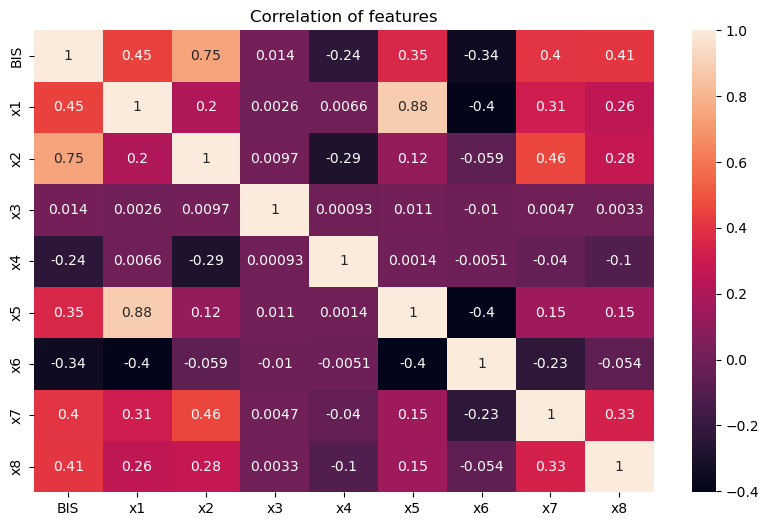

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(Test.corr(), annot = True)
plt.title('Correlation of features')
plt.show()

From the correlation, x2, x1, x8, x7, x5 and x6 seems to be the better features and are listed based on the importance from highest.

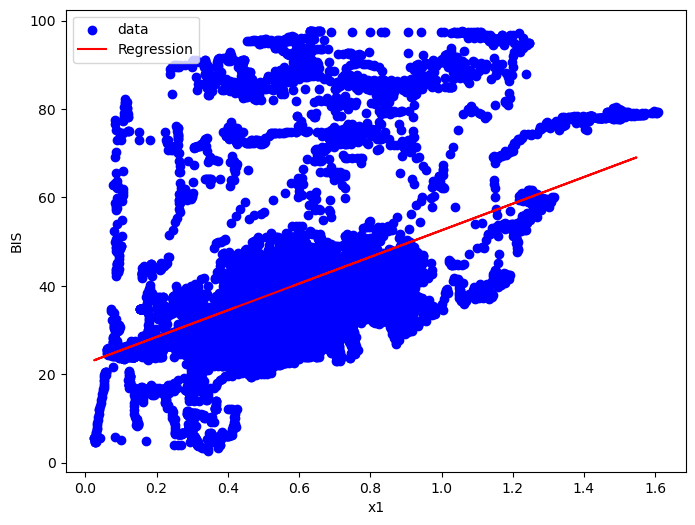

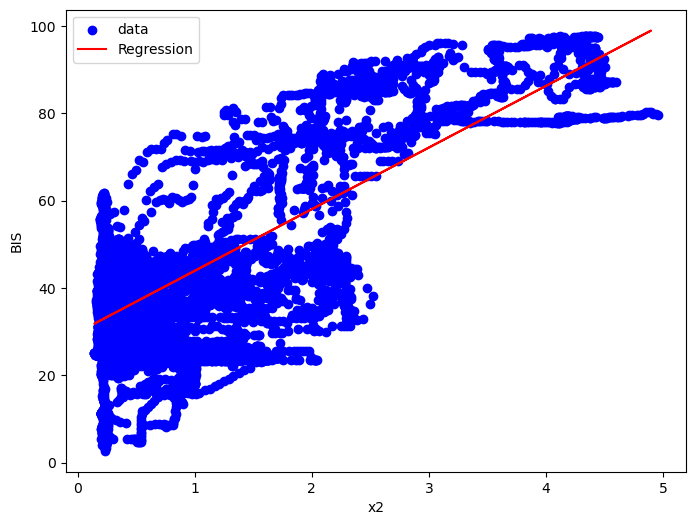

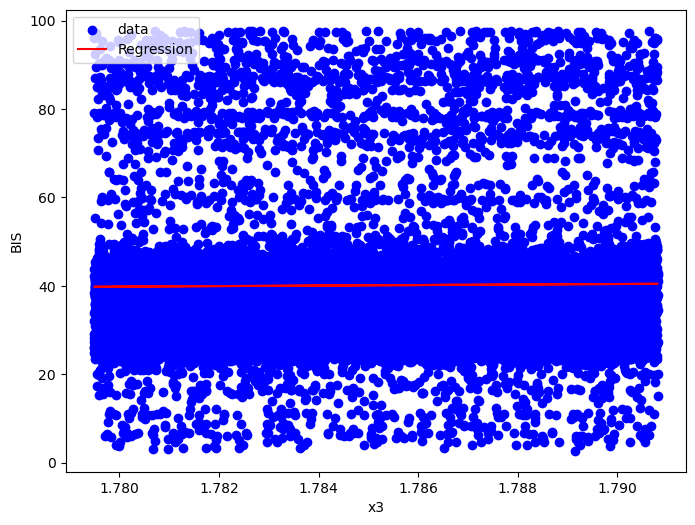

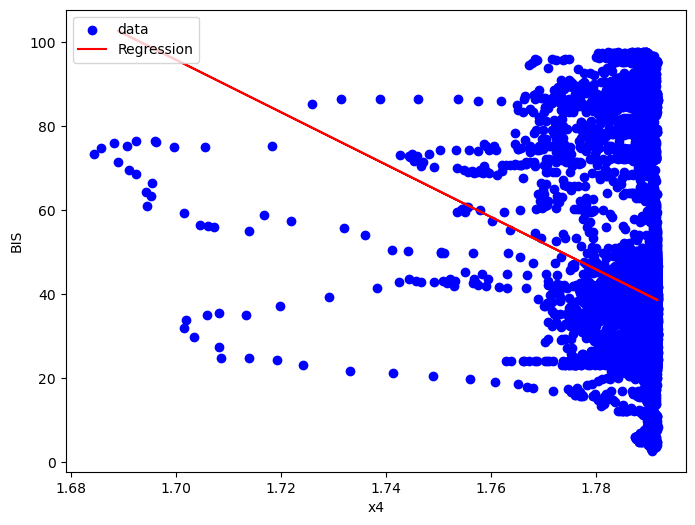

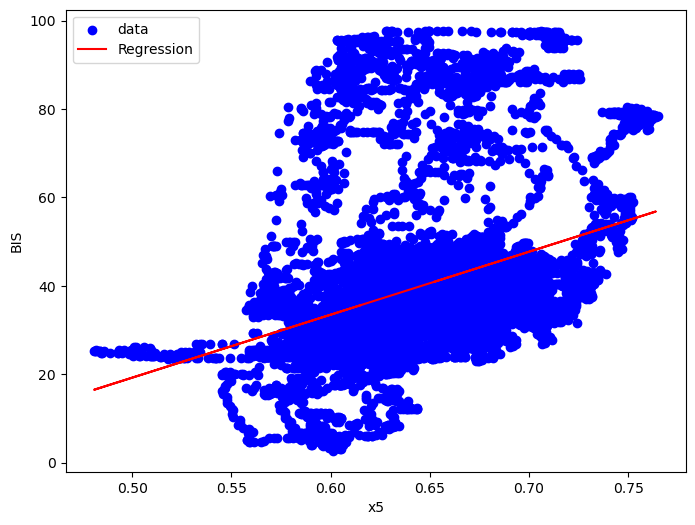

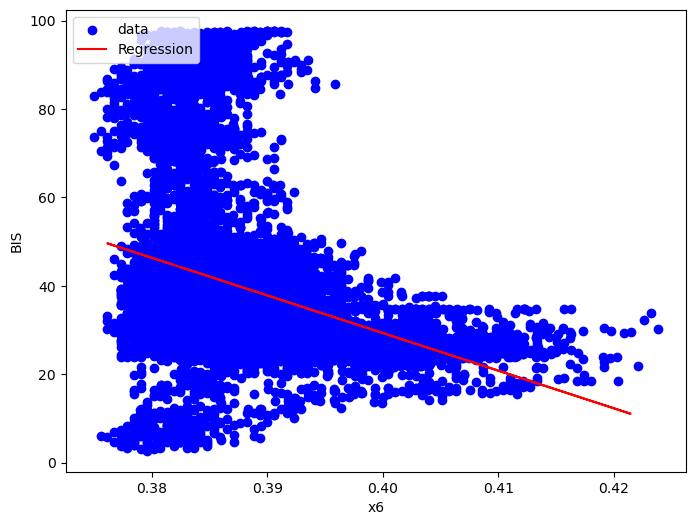

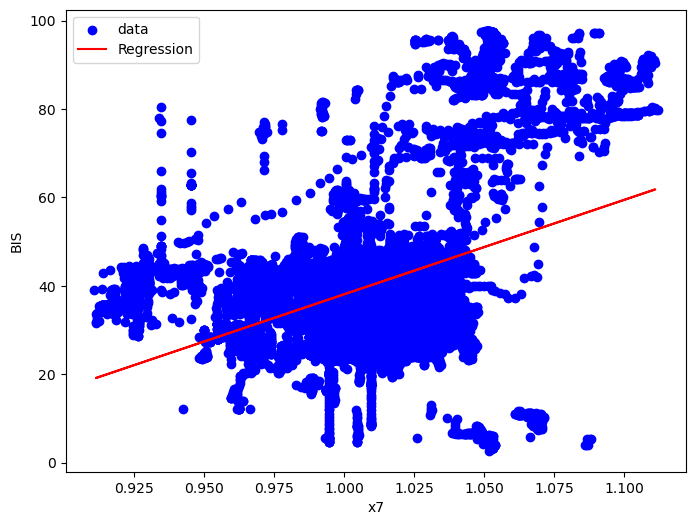

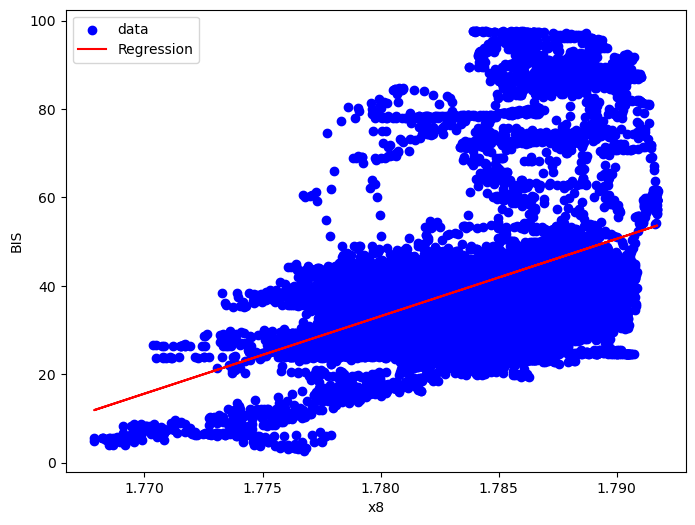

In [17]:
for column in Test.columns:
    if column == "BIS":
        continue
        
    plot_regression(Test, column)
    


In [18]:
# Metrics
pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

Metrics     Values
0   x1_r2  22.066560
1   x2_r2  55.707819
2   x3_r2   0.026110
3   x4_r2   5.514961
4   x5_r2  13.810597
5   x6_r2  13.037002
6   x7_r2  17.795806
7   x8_r2  16.689244

The Rsquared value showed that x2, x1, x7, x8, x5 and x6 seem to be the better features and are listed in their order of importance from the highest.

Feature 1: 2435.191541
Feature 2: 12727.001044
Feature 3: 1.082730
Feature 4: 608.393131
Feature 5: 1384.157646
Feature 6: 1314.825467
Feature 7: 1860.104414
Feature 8: 2149.347047


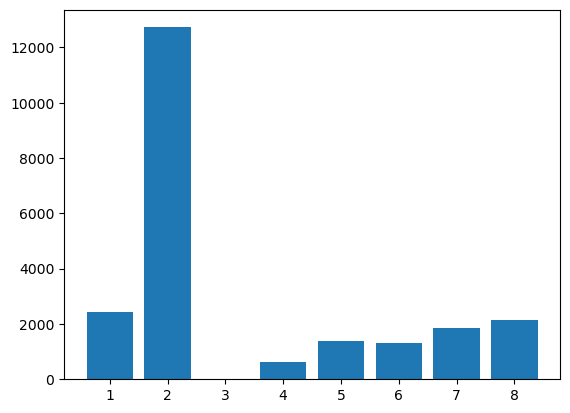

In [19]:

def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X = Test.drop('BIS', axis=1)
y = Test['BIS']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i+1, fs.scores_[i]))
# plot the scores
plt.bar([i+1 for i in range(len(fs.scores_))], fs.scores_)
plt.show()

The f-regression showed that x2, x1, x7, x8, x5 and x6 are the better features.

### Feature selection through random forest

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


X=Train.drop('BIS', axis=1)
y= Train['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 20
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
25      pet_mode0    0.373673
34      lzc_mode4    0.100633
26      pet_mode1    0.069404
30      lzc_mode0    0.032871
33      lzc_mode3    0.029489
4        hm_mode4    0.024761
40      hfd_mode0    0.021336
32      lzc_mode2    0.020326
21  Perment_mode1    0.019024
28      pet_mode3    0.018331
53     Disp_mode3    0.015818
22  Perment_mode2    0.013911
31      lzc_mode1    0.013837
35      svd_mode0    0.013481
6        hc_mode1    0.013428
7        hc_mode2    0.013428
0        hm_mode0    0.011753
20  Perment_mode0    0.010900
54     Disp_mode4    0.010596
38      svd_mode3    0.010014
23  Perment_mode3    0.008888
39      svd_mode4    0.007278
58    dispm_mode3    0.006911
57    dispm_mode2    0.006775
24  Perment_mode4    0.006722
42      hfd_mode2    0.006375
5        hc_mode0    0.005897
41      hfd_mode1    0.005671
29      pet_mode4    0.005505
46     spec_mode1    0.005345
15     detf_mode0    0.005161
27      pet_mode2    0.005043
37      sv